In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection as model_selection

# pipe_line_gene.py
from loading_data import data_preprocess
from models import Bayesian_optimizer, model_gene_based, wide_n_deep, ML_methods, deepAMR_run
from feature_importance import base_approach, lime
from data_analyzer import source_analysis
from dataset_creator import gene_dataset_creator

In [2]:
df = pd.read_csv("Data/AllLabels.csv")
df

,id,amikacin,capreomycin,ciprofloxacin,ethambutol,ethionamide,isoniazid,kanamycin,moxifloxacin,ofloxacin,pyrazinamide,rifampicin,streptomycin
0,SRR6045918,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
1,ERR2512416,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2,ERR2512417,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
3,ERR2512418,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
4,ERR2512419,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22371,SRR958228,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
22372,SRR924709,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
22373,SRR958234,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
22374,SRR924710,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


In [3]:
f = pd.read_csv("Data/gene_data.csv")
f

,SRR1166318,0,0.1,1,0.2,0.3,4,0.4,0.5,0.6,...,0.3362,0.3363,1.493,1.494,0.3364,0.3365,0.3366,0.3367,0.3368,0.3369
0,ERR176810,0,0,1,0,2,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,ERR181956,0,0,1,0,1,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SRR2100379,0,0,1,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SRR924706,0,0,1,0,2,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SRR1169163,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7954,SRR671746,0,0,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7955,SRR1146372,0,0,2,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7956,ERR176477,0,0,1,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7957,SRR1049074,0,0,1,0,0,4,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [17]:
df_train, labels = data_preprocess.process(38, gene_dataset=True)
df_train

label set: (22376, 12)
train set: (7845, 3979)


,1,2,3,4,5,6,7,8,9,10,...,3958,3959,3960,3961,3962,3963,3964,3965,3966,3967
SRR1166318,0,0,1,0,0,4,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
ERR176810,0,0,1,0,2,3,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
ERR181956,0,0,1,0,1,3,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SRR2100379,0,0,1,0,0,4,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SRR924706,0,0,1,0,2,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR671746,0,0,1,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SRR1146372,0,0,2,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ERR176477,0,0,1,0,1,3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SRR1049074,0,0,1,0,0,4,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [23]:
df_train_snp, labels = data_preprocess.process(38)
df_train_snp

(20, 739999)
After dropping
(20, 739999)
label set: (22376, 12)
train set: (20, 740011)


,0,1,2,3,4,5,6,7,8,9,...,739989,739990,739991,739992,739993,739994,739995,739996,739997,739998
SRR1166318,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERR176810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERR181956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR2100379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR924706,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1169163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ERR550791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1172131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1184297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SRR1019145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_instudy = df[df["id"].isin(df_train.index.values)]
df_instudy

,id,amikacin,capreomycin,ciprofloxacin,ethambutol,ethionamide,isoniazid,kanamycin,moxifloxacin,ofloxacin,pyrazinamide,rifampicin,streptomycin
83,SRR3675211,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
101,SRR3675215,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
130,SRR3675217,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0,NaN
145,SRR3675218,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,0.0,NaN
195,SRR3675224,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22364,SRR924705,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
22366,SRR924706,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
22368,SRR924707,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
22370,SRR924708,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


In [9]:
df_instudy.sum(axis = 0, skipna = True)

id               SRR3675211SRR3675215SRR3675217SRR3675218SRR367...
amikacin                                                     573.0
capreomycin                                                  552.0
ciprofloxacin                                                 37.0
ethambutol                                                  1407.0
ethionamide                                                  498.0
isoniazid                                                   3445.0
kanamycin                                                    697.0
moxifloxacin                                                 129.0
ofloxacin                                                    800.0
pyrazinamide                                                 754.0
rifampicin                                                  2968.0
streptomycin                                                2104.0
dtype: object

In [10]:
df_instudy.count(axis = 0)

id               7845
amikacin         2033
capreomycin      1991
ciprofloxacin     443
ethambutol       6096
ethionamide      1516
isoniazid        7734
kanamycin        2436
moxifloxacin      961
ofloxacin        2911
pyrazinamide     3858
rifampicin       7715
streptomycin     5125
dtype: int64

In [11]:
df_instudy.corr()

,amikacin,capreomycin,ciprofloxacin,ethambutol,ethionamide,isoniazid,kanamycin,moxifloxacin,ofloxacin,pyrazinamide,rifampicin,streptomycin
amikacin,1.000000,0.876397,0.541748,0.360565,0.287527,0.330809,0.872621,0.398557,0.467512,0.395727,0.390570,0.323662
capreomycin,0.876397,1.000000,0.467570,0.337008,0.357241,0.318344,0.792352,0.512417,0.489330,0.406807,0.361190,0.313771
ciprofloxacin,0.541748,0.467570,1.000000,0.384804,0.615387,-0.011471,0.643438,0.882705,0.885926,0.558846,0.270630,-0.020479
ethambutol,0.360565,0.337008,0.384804,1.000000,0.351658,0.562189,0.547450,0.210570,0.353428,0.615880,0.631033,0.581937
ethionamide,0.287527,0.357241,0.615387,0.351658,1.000000,0.331411,0.377509,0.249141,0.323244,0.383326,0.324382,0.261735
isoniazid,0.330809,0.318344,-0.011471,0.562189,0.331411,1.000000,0.377141,0.317428,0.341022,0.561361,0.815270,0.677973
kanamycin,0.872621,0.792352,0.643438,0.547450,0.377509,0.377141,1.000000,0.436797,0.565187,0.638102,0.431218,0.426030
moxifloxacin,0.398557,0.512417,0.882705,0.210570,0.249141,0.317428,0.436797,1.000000,0.673374,0.507001,0.367278,0.414907
ofloxacin,0.467512,0.489330,0.885926,0.353428,0.323244,0.341022,0.565187,0.673374,1.000000,0.453176,0.382698,0.307138
pyrazinamide,0.395727,0.406807,0.558846,0.615880,0.383326,0.561361,0.638102,0.507001,0.453176,1.000000,0.674370,0.564807


In [12]:
# Pairwise similarity of resistant status for each pair of drugs
d = np.zeros((len(df_instudy.columns), len(df_instudy.columns)))
for i in range(len(df_instudy.columns)):
    for j in range(len(df_instudy.columns)):
        d[i,j] = len(df_instudy[(df_instudy.iloc[:,i] == 1) & (df_instudy.iloc[:,j] == 1)])
        
pd.DataFrame(d)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,573.0,431.0,8.0,399.0,226.0,530.0,440.0,74.0,333.0,242.0,542.0,449.0
2,0.0,431.0,552.0,12.0,402.0,235.0,512.0,402.0,66.0,331.0,277.0,522.0,462.0
3,0.0,8.0,12.0,37.0,22.0,13.0,31.0,21.0,18.0,25.0,24.0,35.0,16.0
4,0.0,399.0,402.0,22.0,1407.0,323.0,1378.0,472.0,51.0,457.0,492.0,1342.0,1158.0
5,0.0,226.0,235.0,13.0,323.0,498.0,448.0,318.0,67.0,303.0,196.0,432.0,342.0
6,0.0,530.0,512.0,31.0,1378.0,448.0,3445.0,641.0,113.0,747.0,684.0,2840.0,1989.0
7,0.0,440.0,402.0,21.0,472.0,318.0,641.0,697.0,85.0,487.0,247.0,654.0,552.0
8,0.0,74.0,66.0,18.0,51.0,67.0,113.0,85.0,129.0,122.0,81.0,117.0,91.0
9,0.0,333.0,331.0,25.0,457.0,303.0,747.0,487.0,122.0,800.0,255.0,750.0,597.0


In [13]:
# Pairwise similarity of susceptible status for each pair of drugs
d = np.zeros((len(df_instudy.columns), len(df_instudy.columns)))
for i in range(len(df_instudy.columns)):
    for j in range(len(df_instudy.columns)):
        d[i,j] = len(df_instudy[(df_instudy.iloc[:,i] == 0) & (df_instudy.iloc[:,j] == 0)])
        
pd.DataFrame(d)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1460.0,1113.0,60.0,893.0,481.0,554.0,970.0,689.0,1237.0,594.0,614.0,726.0
2,0.0,1113.0,1439.0,89.0,872.0,454.0,512.0,915.0,455.0,1198.0,673.0,545.0,657.0
3,0.0,60.0,89.0,406.0,354.0,26.0,59.0,187.0,35.0,48.0,214.0,212.0,85.0
4,0.0,893.0,872.0,354.0,4689.0,605.0,3208.0,1206.0,629.0,1321.0,2820.0,3608.0,2651.0
5,0.0,481.0,454.0,26.0,605.0,1018.0,348.0,574.0,233.0,649.0,182.0,387.0,500.0
6,0.0,554.0,512.0,59.0,3208.0,348.0,4289.0,778.0,490.0,821.0,2343.0,4141.0,2225.0
7,0.0,970.0,915.0,187.0,1206.0,574.0,778.0,1739.0,639.0,1350.0,509.0,844.0,1104.0
8,0.0,689.0,455.0,35.0,629.0,233.0,490.0,639.0,832.0,731.0,401.0,506.0,643.0
9,0.0,1237.0,1198.0,48.0,1321.0,649.0,821.0,1350.0,731.0,2111.0,708.0,893.0,1101.0


label set: (22376, 12)
train set: (7845, 3979)
drug: 0
fold: 3
Epoch 1/60
33/33 - 1s - loss: 0.6568 - masked_accuracy: 0.5859 - val_loss: 0.6176 - val_masked_accuracy: 0.6621
Epoch 2/60
33/33 - 0s - loss: 0.5803 - masked_accuracy: 0.7093 - val_loss: 0.5708 - val_masked_accuracy: 0.7124
Epoch 3/60
33/33 - 0s - loss: 0.5158 - masked_accuracy: 0.7527 - val_loss: 0.5027 - val_masked_accuracy: 0.7489
Epoch 4/60
33/33 - 0s - loss: 0.4340 - masked_accuracy: 0.7987 - val_loss: 0.4534 - val_masked_accuracy: 0.7884
Epoch 5/60
33/33 - 0s - loss: 0.3965 - masked_accuracy: 0.8217 - val_loss: 0.4678 - val_masked_accuracy: 0.7852
Epoch 6/60
33/33 - 0s - loss: 0.3541 - masked_accuracy: 0.8400 - val_loss: 0.4940 - val_masked_accuracy: 0.7827
Epoch 7/60
33/33 - 0s - loss: 0.3268 - masked_accuracy: 0.8613 - val_loss: 0.5078 - val_masked_accuracy: 0.7834
Epoch 8/60
33/33 - 0s - loss: 0.3067 - masked_accuracy: 0.8656 - val_loss: 0.5114 - val_masked_accuracy: 0.7891
Epoch 9/60
33/33 - 0s - loss: 0.3119 - ma

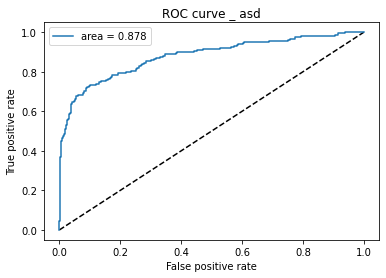

area under ROC curve for val: 0.8781089743589744
|   iter    |  target   |   LSTM1   |   LSTM2   |   LSTM3   |   LSTM4   |   LSTM5   | dense_... | dense_... | dense_... | dense_... | dense_... | dropou... | filter... | filter... | filter... | filter... | filter... |    i1     |    i2     |    i3     | kernel... | kernel... | kernel... | kernel... | kernel... | poolCNN1  | poolCNN2  | poolCNN3  | poolCNN4  | poolCNN5  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/60
33/33 - 2s - loss: 0.6653 - masked_accuracy: 0.5918 - val_loss: 0.6381 - val_masked_accuracy: 0.6864
Epoch 2/60
33/33 - 1s - loss: 0.5829 - masked_accuracy: 0.7092 - val_loss: 0.5796 - val_mas

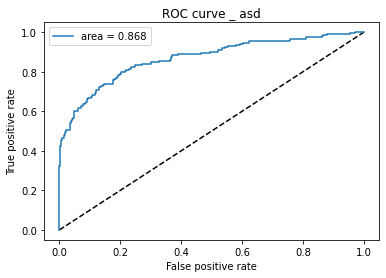

area under ROC curve for val: 0.8678685897435897
|  1        |  0.8679   |  3.903    |  6.086    |  0.9008   |  3.077    |  1.957    |  1.565    |  2.241    |  3.388    |  3.757    |  4.779    |  0.2677   |  6.778    |  4.759    |  7.588    |  4.015    |  6.716    |  3.235    |  3.688    |  2.349    |  3.534    |  5.462    |  5.998    |  3.903    |  5.115    |  5.704    |  5.763    |  3.172    |  3.025    |  3.443    |
Epoch 1/60
33/33 - 3s - loss: 0.6741 - masked_accuracy: 0.5897 - val_loss: 0.6211 - val_masked_accuracy: 0.6813
Epoch 2/60
33/33 - 2s - loss: 0.5911 - masked_accuracy: 0.7029 - val_loss: 0.5460 - val_masked_accuracy: 0.7340
Epoch 3/60
33/33 - 2s - loss: 0.5088 - masked_accuracy: 0.7555 - val_loss: 0.5183 - val_masked_accuracy: 0.7438
Epoch 4/60
33/33 - 3s - loss: 0.4544 - masked_accuracy: 0.7900 - val_loss: 0.4667 - val_masked_accuracy: 0.7722
Epoch 5/60
33/33 - 3s - loss: 0.4368 - masked_accuracy: 0.8101 - val_loss: 0.4738 - val_masked_accuracy: 0.7754
Epoch 6/60
33/33 

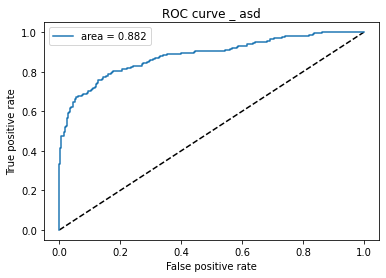

area under ROC curve for val: 0.8816666666666666
|  2        |  0.8817   |  7.223    |  1.608    |  3.932    |  7.797    |  4.739    |  5.882    |  3.172    |  5.843    |  6.909    |  1.032    |  0.4001   |  8.053    |  7.042    |  5.078    |  7.215    |  4.334    |  3.333    |  4.808    |  2.84     |  3.821    |  3.316    |  2.962    |  5.072    |  3.577    |  3.75     |  4.473    |  3.071    |  4.737    |  3.37     |
Epoch 1/60
33/33 - 2s - loss: 0.6527 - masked_accuracy: 0.6269 - val_loss: 0.6382 - val_masked_accuracy: 0.6957
Epoch 2/60
33/33 - 2s - loss: 0.5924 - masked_accuracy: 0.7006 - val_loss: 0.5712 - val_masked_accuracy: 0.7248
Epoch 3/60
33/33 - 2s - loss: 0.5176 - masked_accuracy: 0.7542 - val_loss: 0.5332 - val_masked_accuracy: 0.7464
Epoch 4/60
33/33 - 2s - loss: 0.4799 - masked_accuracy: 0.7818 - val_loss: 0.5186 - val_masked_accuracy: 0.7425
Epoch 5/60
33/33 - 2s - loss: 0.4684 - masked_accuracy: 0.7877 - val_loss: 0.5174 - val_masked_accuracy: 0.7477
Epoch 6/60
33/33 

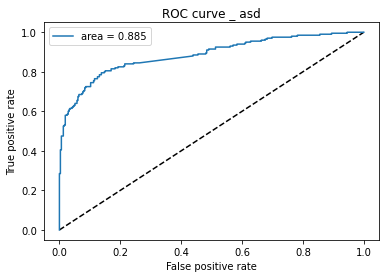

area under ROC curve for val: 0.884911858974359
|  3        |  0.8849   |  5.143    |  5.938    |  1.637    |  3.881    |  5.9      |  3.882    |  1.26     |  4.758    |  5.679    |  4.607    |  0.4778   |  6.364    |  7.694    |  4.477    |  4.485    |  7.291    |  3.173    |  2.429    |  4.868    |  4.013    |  5.303    |  5.223    |  5.727    |  4.896    |  5.303    |  4.016    |  3.764    |  5.767    |  4.27     |
Epoch 1/60
33/33 - 4s - loss: 0.6786 - masked_accuracy: 0.5809 - val_loss: 0.6558 - val_masked_accuracy: 0.5908
Epoch 2/60
33/33 - 3s - loss: 0.6103 - masked_accuracy: 0.6780 - val_loss: 0.5818 - val_masked_accuracy: 0.6904
Epoch 3/60
33/33 - 3s - loss: 0.5715 - masked_accuracy: 0.7282 - val_loss: 0.5729 - val_masked_accuracy: 0.7190
Epoch 4/60
33/33 - 3s - loss: 0.5334 - masked_accuracy: 0.7528 - val_loss: 0.5621 - val_masked_accuracy: 0.7344
Epoch 5/60
33/33 - 3s - loss: 0.5120 - masked_accuracy: 0.7587 - val_loss: 0.5200 - val_masked_accuracy: 0.7443
Epoch 6/60
33/33 -

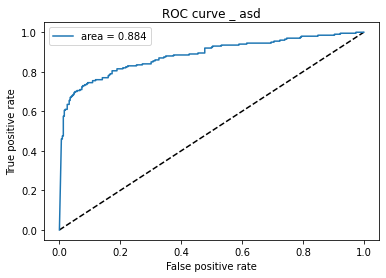

area under ROC curve for val: 0.8841666666666668
|  4        |  0.8842   |  7.847    |  5.677    |  5.376    |  1.726    |  7.736    |  4.139    |  5.064    |  3.839    |  2.607    |  7.404    |  0.3295   |  3.912    |  6.492    |  5.272    |  6.114    |  7.621    |  3.043    |  4.807    |  3.895    |  2.951    |  5.874    |  5.111    |  6.091    |  3.451    |  3.339    |  5.884    |  5.13     |  3.111    |  5.317    |
Epoch 1/60
33/33 - 1s - loss: 0.6514 - masked_accuracy: 0.6231 - val_loss: 0.6310 - val_masked_accuracy: 0.6859
Epoch 2/60
33/33 - 1s - loss: 0.5857 - masked_accuracy: 0.7056 - val_loss: 0.6062 - val_masked_accuracy: 0.7136
Epoch 3/60
33/33 - 1s - loss: 0.5504 - masked_accuracy: 0.7322 - val_loss: 0.5799 - val_masked_accuracy: 0.7208
Epoch 4/60
33/33 - 1s - loss: 0.5328 - masked_accuracy: 0.7466 - val_loss: 0.5987 - val_masked_accuracy: 0.7143
Epoch 5/60
33/33 - 1s - loss: 0.5062 - masked_accuracy: 0.7620 - val_loss: 0.6049 - val_masked_accuracy: 0.7390
Epoch 6/60
33/33 

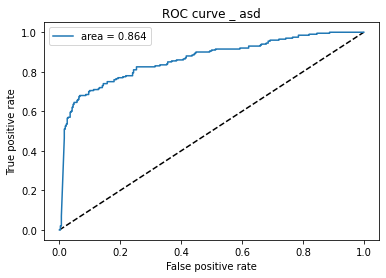

area under ROC curve for val: 0.8639983974358973
|  5        |  0.864    |  6.328    |  7.546    |  6.023    |  1.795    |  1.043    |  1.089    |  1.104    |  2.673    |  7.092    |  4.78     |  0.3211   |  7.437    |  4.422    |  5.073    |  6.36     |  7.972    |  3.695    |  1.96     |  4.462    |  3.646    |  5.483    |  4.141    |  5.663    |  5.291    |  4.68     |  3.337    |  3.092    |  3.288    |  3.043    |
Epoch 1/60
33/33 - 2s - loss: 0.6689 - masked_accuracy: 0.5931 - val_loss: 0.6301 - val_masked_accuracy: 0.6722
Epoch 2/60
33/33 - 1s - loss: 0.6043 - masked_accuracy: 0.6963 - val_loss: 0.5796 - val_masked_accuracy: 0.7241
Epoch 3/60
33/33 - 1s - loss: 0.5673 - masked_accuracy: 0.7244 - val_loss: 0.5600 - val_masked_accuracy: 0.7209
Epoch 4/60
33/33 - 1s - loss: 0.5287 - masked_accuracy: 0.7532 - val_loss: 0.5227 - val_masked_accuracy: 0.7431
Epoch 5/60
33/33 - 1s - loss: 0.4763 - masked_accuracy: 0.7844 - val_loss: 0.4732 - val_masked_accuracy: 0.7715
Epoch 6/60
33/33 

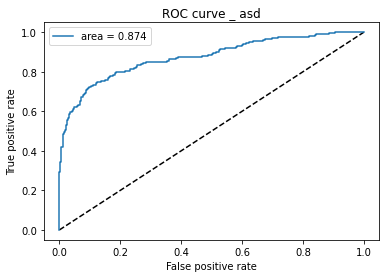

area under ROC curve for val: 0.8740705128205128
|  6        |  0.8741   |  1.674    |  2.525    |  6.034    |  4.93     |  0.9904   |  1.418    |  7.864    |  4.99     |  2.364    |  2.717    |  0.3975   |  4.721    |  6.342    |  7.974    |  7.457    |  4.907    |  3.48     |  3.884    |  4.553    |  3.402    |  2.959    |  3.124    |  4.456    |  4.84     |  4.72     |  3.916    |  6.064    |  4.755    |  4.116    |
Epoch 1/60
33/33 - 3s - loss: 0.6371 - masked_accuracy: 0.6351 - val_loss: 0.6029 - val_masked_accuracy: 0.7164
Epoch 2/60
33/33 - 2s - loss: 0.5874 - masked_accuracy: 0.7132 - val_loss: 0.5675 - val_masked_accuracy: 0.7060
Epoch 3/60
33/33 - 2s - loss: 0.5099 - masked_accuracy: 0.7590 - val_loss: 0.5398 - val_masked_accuracy: 0.7118
Epoch 4/60
33/33 - 2s - loss: 0.4504 - masked_accuracy: 0.7960 - val_loss: 0.5086 - val_masked_accuracy: 0.7554
Epoch 5/60
33/33 - 2s - loss: 0.3946 - masked_accuracy: 0.8241 - val_loss: 0.5285 - val_masked_accuracy: 0.7536
Epoch 6/60
33/33 

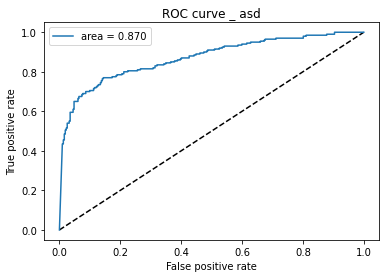

area under ROC curve for val: 0.8698798076923078
|  7        |  0.8699   |  4.867    |  6.266    |  5.718    |  2.807    |  1.378    |  3.565    |  5.434    |  2.413    |  6.32     |  1.379    |  0.2041   |  7.28     |  4.712    |  6.586    |  6.104    |  7.784    |  2.743    |  2.111    |  4.252    |  5.371    |  5.805    |  5.882    |  2.945    |  3.65     |  4.874    |  5.937    |  5.941    |  4.681    |  5.83     |
Epoch 1/60
33/33 - 2s - loss: 0.6381 - masked_accuracy: 0.6455 - val_loss: 0.6037 - val_masked_accuracy: 0.6969
Epoch 2/60
33/33 - 1s - loss: 0.5715 - masked_accuracy: 0.7132 - val_loss: 0.5981 - val_masked_accuracy: 0.7230
Epoch 3/60
33/33 - 1s - loss: 0.5168 - masked_accuracy: 0.7537 - val_loss: 0.5095 - val_masked_accuracy: 0.7612
Epoch 4/60
33/33 - 1s - loss: 0.4361 - masked_accuracy: 0.8015 - val_loss: 0.4953 - val_masked_accuracy: 0.7658
Epoch 5/60
33/33 - 1s - loss: 0.4079 - masked_accuracy: 0.8215 - val_loss: 0.4623 - val_masked_accuracy: 0.7827
Epoch 6/60
33/33 

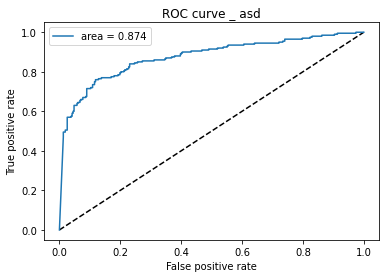

area under ROC curve for val: 0.8744711538461538
|  8        |  0.8745   |  5.519    |  3.708    |  4.399    |  5.251    |  4.857    |  7.569    |  7.515    |  3.743    |  7.835    |  2.152    |  0.1505   |  4.467    |  6.024    |  3.99     |  7.881    |  7.374    |  1.948    |  2.464    |  2.963    |  3.319    |  5.49     |  4.003    |  5.908    |  4.762    |  5.712    |  5.603    |  5.797    |  4.372    |  4.648    |
Epoch 1/60
33/33 - 4s - loss: 0.6806 - masked_accuracy: 0.5868 - val_loss: 0.6763 - val_masked_accuracy: 0.5908
Epoch 2/60
33/33 - 2s - loss: 0.6413 - masked_accuracy: 0.6178 - val_loss: 0.6125 - val_masked_accuracy: 0.6807
Epoch 3/60
33/33 - 2s - loss: 0.5797 - masked_accuracy: 0.7077 - val_loss: 0.5702 - val_masked_accuracy: 0.7254
Epoch 4/60
33/33 - 2s - loss: 0.5517 - masked_accuracy: 0.7336 - val_loss: 0.5663 - val_masked_accuracy: 0.7195
Epoch 5/60
33/33 - 2s - loss: 0.5216 - masked_accuracy: 0.7560 - val_loss: 0.5479 - val_masked_accuracy: 0.7293
Epoch 6/60
33/33 

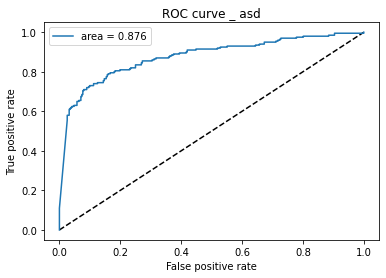

area under ROC curve for val: 0.8762500000000001
|  9        |  0.8763   |  6.65     |  2.957    |  4.43     |  5.214    |  1.012    |  5.173    |  4.022    |  6.713    |  3.17     |  7.329    |  0.3311   |  4.673    |  7.209    |  6.471    |  4.126    |  5.665    |  4.073    |  4.84     |  1.901    |  6.026    |  4.105    |  6.016    |  4.835    |  5.552    |  4.739    |  4.91     |  3.814    |  4.778    |  5.3      |
Epoch 1/60
33/33 - 3s - loss: 0.6425 - masked_accuracy: 0.6405 - val_loss: 0.6274 - val_masked_accuracy: 0.6867
Epoch 2/60
33/33 - 2s - loss: 0.5334 - masked_accuracy: 0.7518 - val_loss: 0.5629 - val_masked_accuracy: 0.7211
Epoch 3/60
33/33 - 2s - loss: 0.4863 - masked_accuracy: 0.7845 - val_loss: 0.5363 - val_masked_accuracy: 0.7522
Epoch 4/60
33/33 - 2s - loss: 0.4369 - masked_accuracy: 0.8124 - val_loss: 0.4972 - val_masked_accuracy: 0.7711
Epoch 5/60
33/33 - 2s - loss: 0.4123 - masked_accuracy: 0.8226 - val_loss: 0.5207 - val_masked_accuracy: 0.7847
Epoch 6/60
33/33 

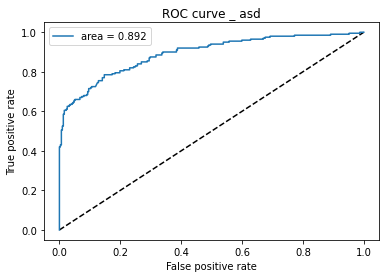

area under ROC curve for val: 0.8920352564102563
|  10       |  0.892    |  7.08     |  6.337    |  5.926    |  7.124    |  3.223    |  5.73     |  4.146    |  3.651    |  3.858    |  3.791    |  0.227    |  6.512    |  5.707    |  7.99     |  6.747    |  4.734    |  3.265    |  2.999    |  4.452    |  5.716    |  5.792    |  5.021    |  3.765    |  3.708    |  5.636    |  4.589    |  5.467    |  4.732    |  5.246    |
Epoch 1/60
33/33 - 3s - loss: 0.6597 - masked_accuracy: 0.6045 - val_loss: 0.6561 - val_masked_accuracy: 0.6450
Epoch 2/60
33/33 - 2s - loss: 0.6068 - masked_accuracy: 0.6951 - val_loss: 0.5931 - val_masked_accuracy: 0.6943
Epoch 3/60
33/33 - 2s - loss: 0.5751 - masked_accuracy: 0.7145 - val_loss: 0.5716 - val_masked_accuracy: 0.7021
Epoch 4/60
33/33 - 2s - loss: 0.5305 - masked_accuracy: 0.7331 - val_loss: 0.5417 - val_masked_accuracy: 0.7365
Epoch 5/60
33/33 - 2s - loss: 0.4788 - masked_accuracy: 0.7732 - val_loss: 0.4916 - val_masked_accuracy: 0.7735
Epoch 6/60
33/33 

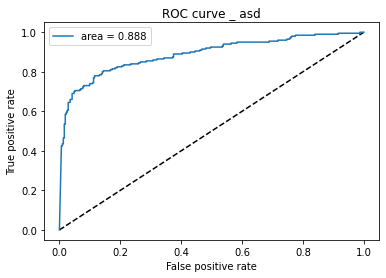

area under ROC curve for val: 0.8883814102564103
|  11       |  0.8884   |  4.637    |  6.45     |  4.996    |  4.253    |  3.367    |  1.391    |  3.621    |  1.473    |  7.976    |  2.208    |  0.4247   |  7.575    |  6.791    |  6.292    |  4.576    |  5.861    |  3.005    |  2.62     |  3.796    |  3.899    |  5.832    |  5.811    |  3.723    |  3.255    |  3.517    |  4.499    |  5.231    |  3.566    |  3.694    |
Epoch 1/60
33/33 - 2s - loss: 0.6544 - masked_accuracy: 0.6284 - val_loss: 0.6318 - val_masked_accuracy: 0.6879
Epoch 2/60
33/33 - 2s - loss: 0.5896 - masked_accuracy: 0.7106 - val_loss: 0.5866 - val_masked_accuracy: 0.7014
Epoch 3/60
33/33 - 2s - loss: 0.5544 - masked_accuracy: 0.7280 - val_loss: 0.5679 - val_masked_accuracy: 0.7143
Epoch 4/60
33/33 - 2s - loss: 0.5263 - masked_accuracy: 0.7487 - val_loss: 0.5399 - val_masked_accuracy: 0.7229
Epoch 5/60
33/33 - 2s - loss: 0.4858 - masked_accuracy: 0.7824 - val_loss: 0.4916 - val_masked_accuracy: 0.7909
Epoch 6/60
33/33 

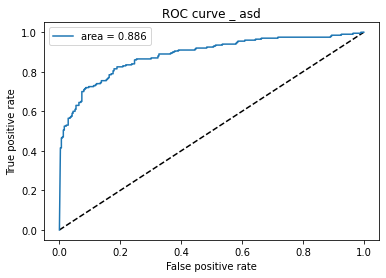

area under ROC curve for val: 0.8860657051282051
|  12       |  0.8861   |  7.032    |  3.894    |  5.34     |  2.582    |  1.634    |  4.614    |  4.335    |  1.999    |  5.377    |  4.817    |  0.3617   |  4.507    |  7.056    |  4.833    |  6.081    |  7.198    |  1.971    |  2.938    |  4.693    |  5.603    |  4.623    |  5.673    |  5.939    |  5.545    |  5.633    |  3.216    |  4.984    |  5.151    |  4.853    |
Epoch 1/60
33/33 - 3s - loss: 0.6815 - masked_accuracy: 0.5839 - val_loss: 0.6585 - val_masked_accuracy: 0.6562
Epoch 2/60
33/33 - 2s - loss: 0.6196 - masked_accuracy: 0.6824 - val_loss: 0.5766 - val_masked_accuracy: 0.6989
Epoch 3/60
33/33 - 2s - loss: 0.5270 - masked_accuracy: 0.7492 - val_loss: 0.5016 - val_masked_accuracy: 0.7470
Epoch 4/60
33/33 - 2s - loss: 0.4728 - masked_accuracy: 0.7864 - val_loss: 0.4734 - val_masked_accuracy: 0.7829
Epoch 5/60
33/33 - 2s - loss: 0.4523 - masked_accuracy: 0.7955 - val_loss: 0.4652 - val_masked_accuracy: 0.7852
Epoch 6/60
33/33 

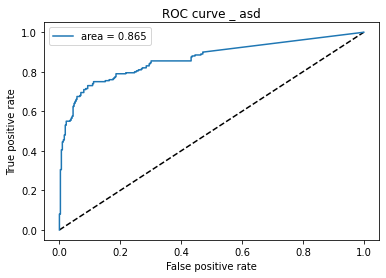

area under ROC curve for val: 0.8650480769230768
|  13       |  0.865    |  6.657    |  1.149    |  6.446    |  6.168    |  2.77     |  2.751    |  5.453    |  3.386    |  6.635    |  4.112    |  0.4131   |  8.06     |  5.161    |  4.501    |  7.685    |  6.175    |  5.019    |  3.937    |  5.081    |  4.647    |  4.585    |  3.333    |  4.038    |  2.984    |  3.413    |  5.286    |  2.997    |  4.073    |  5.66     |
Epoch 1/60
33/33 - 3s - loss: 0.6336 - masked_accuracy: 0.6466 - val_loss: 0.5722 - val_masked_accuracy: 0.7054
Epoch 2/60
33/33 - 2s - loss: 0.5217 - masked_accuracy: 0.7497 - val_loss: 0.4773 - val_masked_accuracy: 0.7658
Epoch 3/60
33/33 - 2s - loss: 0.4654 - masked_accuracy: 0.7849 - val_loss: 0.5499 - val_masked_accuracy: 0.7132
Epoch 4/60
33/33 - 2s - loss: 0.4270 - masked_accuracy: 0.8035 - val_loss: 0.4716 - val_masked_accuracy: 0.7626
Epoch 5/60
33/33 - 2s - loss: 0.3792 - masked_accuracy: 0.8306 - val_loss: 0.4639 - val_masked_accuracy: 0.7898
Epoch 6/60
33/33 

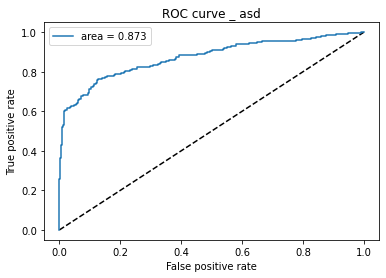

area under ROC curve for val: 0.8729326923076922
|  14       |  0.8729   |  5.887    |  5.875    |  2.258    |  4.082    |  5.087    |  8.026    |  2.368    |  2.684    |  2.788    |  6.301    |  0.2828   |  4.139    |  6.036    |  4.79     |  7.254    |  5.149    |  1.988    |  3.799    |  4.6      |  4.119    |  5.3      |  4.536    |  4.631    |  5.97     |  5.473    |  3.003    |  5.17     |  4.388    |  5.932    |
Epoch 1/60
33/33 - 1s - loss: 0.6479 - masked_accuracy: 0.6194 - val_loss: 0.6074 - val_masked_accuracy: 0.6930
Epoch 2/60
33/33 - 1s - loss: 0.5876 - masked_accuracy: 0.7096 - val_loss: 0.5742 - val_masked_accuracy: 0.7182
Epoch 3/60
33/33 - 1s - loss: 0.5585 - masked_accuracy: 0.7304 - val_loss: 0.5623 - val_masked_accuracy: 0.7351
Epoch 4/60
33/33 - 1s - loss: 0.5337 - masked_accuracy: 0.7437 - val_loss: 0.5292 - val_masked_accuracy: 0.7450
Epoch 5/60
33/33 - 1s - loss: 0.4898 - masked_accuracy: 0.7692 - val_loss: 0.4912 - val_masked_accuracy: 0.7865
Epoch 6/60
33/33 

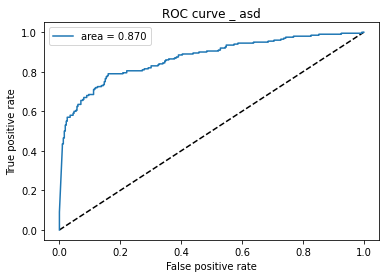

area under ROC curve for val: 0.8700641025641025
|  15       |  0.8701   |  2.494    |  2.823    |  1.487    |  3.986    |  1.685    |  5.463    |  6.681    |  5.917    |  6.417    |  3.366    |  0.4383   |  5.701    |  7.361    |  6.531    |  4.502    |  4.229    |  1.959    |  2.114    |  3.367    |  3.263    |  2.989    |  5.316    |  4.164    |  5.29     |  4.348    |  4.34     |  4.43     |  4.417    |  5.47     |
Epoch 1/60
33/33 - 2s - loss: 0.6618 - masked_accuracy: 0.6097 - val_loss: 0.6530 - val_masked_accuracy: 0.6722
Epoch 2/60
33/33 - 1s - loss: 0.6068 - masked_accuracy: 0.6971 - val_loss: 0.6083 - val_masked_accuracy: 0.7099
Epoch 3/60
33/33 - 1s - loss: 0.5550 - masked_accuracy: 0.7289 - val_loss: 0.5955 - val_masked_accuracy: 0.7222
Epoch 4/60
33/33 - 1s - loss: 0.5118 - masked_accuracy: 0.7620 - val_loss: 0.5385 - val_masked_accuracy: 0.7515
Epoch 5/60
33/33 - 1s - loss: 0.4724 - masked_accuracy: 0.7847 - val_loss: 0.4943 - val_masked_accuracy: 0.7886
Epoch 6/60
33/33 

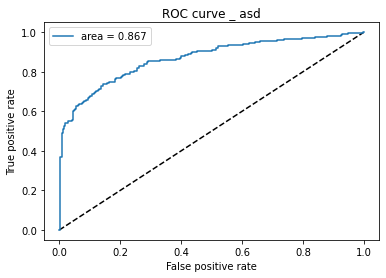

area under ROC curve for val: 0.8667467948717948
|  16       |  0.8667   |  6.485    |  4.357    |  6.135    |  7.028    |  3.833    |  1.14     |  3.778    |  5.425    |  4.153    |  5.298    |  0.3981   |  7.131    |  5.528    |  5.358    |  7.548    |  8.063    |  4.421    |  1.979    |  4.818    |  6.088    |  3.765    |  5.386    |  4.396    |  5.776    |  3.066    |  4.945    |  3.874    |  5.401    |  4.523    |
Epoch 1/60
33/33 - 4s - loss: 0.6787 - masked_accuracy: 0.5883 - val_loss: 0.6568 - val_masked_accuracy: 0.5908
Epoch 2/60
33/33 - 3s - loss: 0.6361 - masked_accuracy: 0.6511 - val_loss: 0.5995 - val_masked_accuracy: 0.6943
Epoch 3/60
33/33 - 4s - loss: 0.5844 - masked_accuracy: 0.7156 - val_loss: 0.5698 - val_masked_accuracy: 0.7227
Epoch 4/60
33/33 - 4s - loss: 0.5601 - masked_accuracy: 0.7293 - val_loss: 0.5580 - val_masked_accuracy: 0.7208
Epoch 5/60
33/33 - 3s - loss: 0.5241 - masked_accuracy: 0.7488 - val_loss: 0.5479 - val_masked_accuracy: 0.7266
Epoch 6/60
33/33 

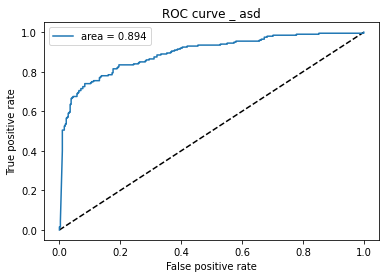

area under ROC curve for val: 0.8938301282051282
|  17       |  0.8938   |  6.562    |  5.736    |  7.109    |  4.785    |  1.76     |  4.226    |  3.931    |  1.86     |  4.688    |  4.106    |  0.3796   |  4.884    |  7.67     |  4.44     |  5.908    |  7.091    |  2.397    |  4.796    |  4.723    |  5.762    |  5.483    |  5.854    |  5.118    |  4.709    |  5.653    |  3.117    |  3.062    |  5.091    |  4.336    |
Epoch 1/60
33/33 - 4s - loss: 0.6550 - masked_accuracy: 0.6186 - val_loss: 0.6162 - val_masked_accuracy: 0.6717
Epoch 2/60
33/33 - 3s - loss: 0.5914 - masked_accuracy: 0.7062 - val_loss: 0.5635 - val_masked_accuracy: 0.7435
Epoch 3/60
33/33 - 3s - loss: 0.5384 - masked_accuracy: 0.7338 - val_loss: 0.5194 - val_masked_accuracy: 0.7495
Epoch 4/60
33/33 - 3s - loss: 0.5240 - masked_accuracy: 0.7483 - val_loss: 0.5412 - val_masked_accuracy: 0.7241
Epoch 5/60
33/33 - 3s - loss: 0.4848 - masked_accuracy: 0.7769 - val_loss: 0.4924 - val_masked_accuracy: 0.7891
Epoch 6/60
33/33 

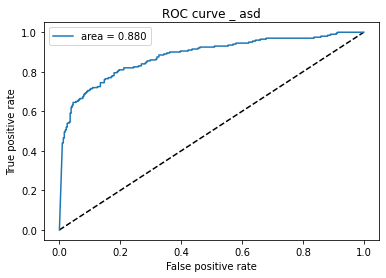

area under ROC curve for val: 0.8804647435897436
|  18       |  0.8805   |  6.875    |  5.777    |  6.442    |  5.291    |  2.341    |  4.903    |  4.004    |  2.373    |  4.523    |  4.073    |  0.3316   |  5.287    |  7.129    |  5.762    |  6.071    |  6.169    |  2.535    |  3.973    |  4.626    |  5.727    |  5.537    |  5.616    |  4.853    |  4.418    |  5.727    |  3.522    |  4.22     |  5.001    |  4.649    |
Epoch 1/60
33/33 - 4s - loss: 0.6832 - masked_accuracy: 0.5825 - val_loss: 0.6713 - val_masked_accuracy: 0.5908
Epoch 2/60
33/33 - 3s - loss: 0.6327 - masked_accuracy: 0.6489 - val_loss: 0.5946 - val_masked_accuracy: 0.7138
Epoch 3/60
33/33 - 3s - loss: 0.5785 - masked_accuracy: 0.7229 - val_loss: 0.5753 - val_masked_accuracy: 0.7072
Epoch 4/60
33/33 - 3s - loss: 0.5490 - masked_accuracy: 0.7387 - val_loss: 0.5709 - val_masked_accuracy: 0.7143
Epoch 5/60
33/33 - 3s - loss: 0.5245 - masked_accuracy: 0.7562 - val_loss: 0.5503 - val_masked_accuracy: 0.7365
Epoch 6/60
33/33 

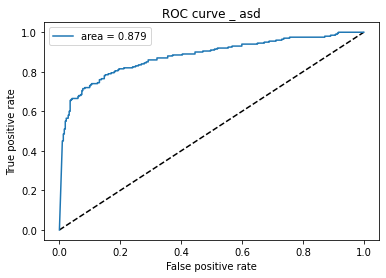

area under ROC curve for val: 0.8790224358974359
|  19       |  0.879    |  6.659    |  4.994    |  6.602    |  3.775    |  1.549    |  4.202    |  4.071    |  1.756    |  5.004    |  4.397    |  0.3871   |  4.603    |  7.611    |  4.209    |  5.918    |  7.394    |  2.185    |  4.316    |  4.74     |  5.714    |  5.13     |  5.863    |  5.525    |  5.119    |  5.633    |  3.03     |  3.479    |  5.15     |  4.449    |
Epoch 1/60
33/33 - 2s - loss: 0.6206 - masked_accuracy: 0.6673 - val_loss: 0.5813 - val_masked_accuracy: 0.6898
Epoch 2/60
33/33 - 2s - loss: 0.5139 - masked_accuracy: 0.7458 - val_loss: 0.5346 - val_masked_accuracy: 0.7100
Epoch 3/60
33/33 - 2s - loss: 0.4559 - masked_accuracy: 0.7890 - val_loss: 0.5096 - val_masked_accuracy: 0.7554
Epoch 4/60
33/33 - 2s - loss: 0.3926 - masked_accuracy: 0.8220 - val_loss: 0.5109 - val_masked_accuracy: 0.7586
Epoch 5/60
33/33 - 2s - loss: 0.3798 - masked_accuracy: 0.8307 - val_loss: 0.4889 - val_masked_accuracy: 0.7891
Epoch 6/60
33/33 

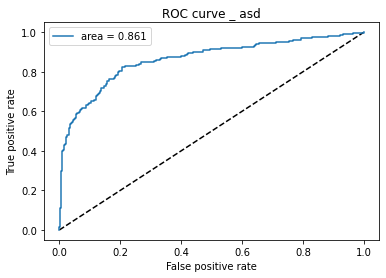

area under ROC curve for val: 0.8612339743589743
|  20       |  0.8612   |  5.979    |  6.571    |  5.407    |  7.672    |  3.099    |  5.354    |  4.072    |  1.457    |  3.877    |  2.948    |  0.2037   |  6.17     |  7.348    |  6.124    |  7.582    |  4.174    |  2.997    |  2.871    |  3.68     |  5.033    |  5.107    |  5.654    |  5.925    |  4.426    |  4.923    |  5.35     |  4.852    |  4.799    |  5.481    |
Epoch 1/60
33/33 - 4s - loss: 0.6524 - masked_accuracy: 0.6182 - val_loss: 0.6056 - val_masked_accuracy: 0.7035
Epoch 2/60
33/33 - 2s - loss: 0.5728 - masked_accuracy: 0.7184 - val_loss: 0.5613 - val_masked_accuracy: 0.7150
Epoch 3/60
33/33 - 3s - loss: 0.4951 - masked_accuracy: 0.7593 - val_loss: 0.5141 - val_masked_accuracy: 0.7371
Epoch 4/60
33/33 - 2s - loss: 0.4348 - masked_accuracy: 0.7978 - val_loss: 0.4766 - val_masked_accuracy: 0.7697
Epoch 5/60
33/33 - 2s - loss: 0.4059 - masked_accuracy: 0.8237 - val_loss: 0.4734 - val_masked_accuracy: 0.7930
Epoch 6/60
33/33 

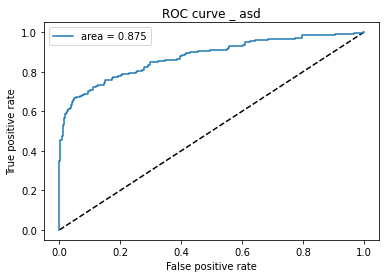

area under ROC curve for val: 0.8748076923076923
|  21       |  0.8748   |  5.912    |  2.961    |  6.375    |  1.775    |  1.958    |  5.991    |  5.881    |  1.047    |  4.846    |  2.993    |  0.1836   |  3.978    |  7.61     |  5.522    |  5.307    |  5.318    |  2.449    |  3.746    |  3.731    |  5.026    |  4.99     |  4.954    |  5.042    |  4.958    |  3.689    |  3.085    |  5.619    |  5.656    |  4.356    |
Epoch 1/60
33/33 - 2s - loss: 0.6554 - masked_accuracy: 0.6195 - val_loss: 0.6235 - val_masked_accuracy: 0.6898
Epoch 2/60
33/33 - 2s - loss: 0.5858 - masked_accuracy: 0.6973 - val_loss: 0.6216 - val_masked_accuracy: 0.7182
Epoch 3/60
33/33 - 2s - loss: 0.5521 - masked_accuracy: 0.7221 - val_loss: 0.5771 - val_masked_accuracy: 0.7014
Epoch 4/60
33/33 - 2s - loss: 0.4971 - masked_accuracy: 0.7569 - val_loss: 0.5130 - val_masked_accuracy: 0.7650
Epoch 5/60
33/33 - 2s - loss: 0.4388 - masked_accuracy: 0.8014 - val_loss: 0.4924 - val_masked_accuracy: 0.7767
Epoch 6/60
33/33 

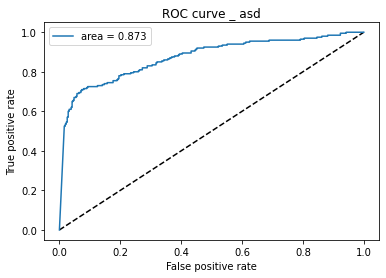

area under ROC curve for val: 0.8729807692307693
|  22       |  0.873    |  6.487    |  5.225    |  0.9029   |  4.097    |  5.4      |  4.105    |  3.751    |  3.039    |  4.151    |  4.791    |  0.279    |  6.44     |  7.337    |  4.103    |  5.097    |  6.584    |  3.473    |  2.006    |  4.222    |  2.929    |  3.863    |  5.11     |  5.082    |  5.872    |  4.781    |  3.905    |  3.914    |  6.048    |  3.863    |
Epoch 1/60
33/33 - 3s - loss: 0.6397 - masked_accuracy: 0.6401 - val_loss: 0.5882 - val_masked_accuracy: 0.7125
Epoch 2/60
33/33 - 3s - loss: 0.5628 - masked_accuracy: 0.7249 - val_loss: 0.5472 - val_masked_accuracy: 0.7211
Epoch 3/60
33/33 - 3s - loss: 0.4852 - masked_accuracy: 0.7767 - val_loss: 0.4986 - val_masked_accuracy: 0.7489
Epoch 4/60
33/33 - 3s - loss: 0.4415 - masked_accuracy: 0.8061 - val_loss: 0.4882 - val_masked_accuracy: 0.7536
Epoch 5/60
33/33 - 3s - loss: 0.4185 - masked_accuracy: 0.8154 - val_loss: 0.4647 - val_masked_accuracy: 0.7950
Epoch 6/60
33/33 

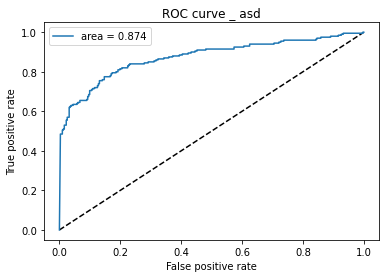

area under ROC curve for val: 0.8739022435897437
|  23       |  0.8739   |  5.207    |  3.995    |  6.648    |  3.899    |  3.832    |  5.656    |  4.538    |  2.328    |  4.895    |  4.868    |  0.2619   |  6.177    |  6.893    |  3.995    |  6.797    |  5.372    |  1.973    |  3.472    |  4.443    |  5.136    |  5.621    |  5.337    |  4.095    |  3.595    |  5.493    |  4.787    |  3.5      |  4.047    |  4.385    |
Epoch 1/60
33/33 - 4s - loss: 0.6694 - masked_accuracy: 0.6022 - val_loss: 0.6585 - val_masked_accuracy: 0.6735
Epoch 2/60
33/33 - 3s - loss: 0.6072 - masked_accuracy: 0.6765 - val_loss: 0.6122 - val_masked_accuracy: 0.6976
Epoch 3/60
33/33 - 5s - loss: 0.5403 - masked_accuracy: 0.7428 - val_loss: 0.5491 - val_masked_accuracy: 0.7527
Epoch 4/60
33/33 - 4s - loss: 0.4646 - masked_accuracy: 0.7841 - val_loss: 0.5181 - val_masked_accuracy: 0.7717
Epoch 5/60
33/33 - 4s - loss: 0.4138 - masked_accuracy: 0.8081 - val_loss: 0.5464 - val_masked_accuracy: 0.7662
Epoch 6/60
33/33 

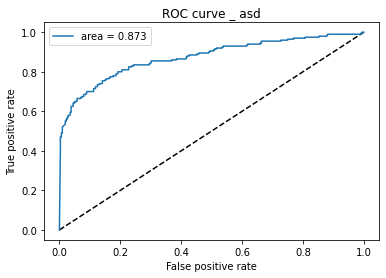

area under ROC curve for val: 0.8733012820512822
|  24       |  0.8733   |  8.075    |  7.374    |  4.265    |  7.044    |  2.193    |  3.878    |  4.552    |  5.301    |  5.108    |  4.05     |  0.2265   |  8.088    |  4.82     |  7.215    |  5.871    |  6.259    |  4.721    |  2.455    |  4.135    |  5.786    |  4.269    |  4.626    |  4.592    |  3.761    |  4.562    |  3.693    |  5.533    |  4.155    |  5.683    |
Epoch 1/60
33/33 - 2s - loss: 0.6315 - masked_accuracy: 0.6459 - val_loss: 0.5751 - val_masked_accuracy: 0.7035
Epoch 2/60
33/33 - 2s - loss: 0.5312 - masked_accuracy: 0.7500 - val_loss: 0.5117 - val_masked_accuracy: 0.7432
Epoch 3/60
33/33 - 2s - loss: 0.4632 - masked_accuracy: 0.7883 - val_loss: 0.4781 - val_masked_accuracy: 0.7886
Epoch 4/60
33/33 - 2s - loss: 0.4201 - masked_accuracy: 0.8190 - val_loss: 0.5186 - val_masked_accuracy: 0.7742
Epoch 5/60
33/33 - 2s - loss: 0.3825 - masked_accuracy: 0.8424 - val_loss: 0.5102 - val_masked_accuracy: 0.7717
Epoch 6/60
33/33 

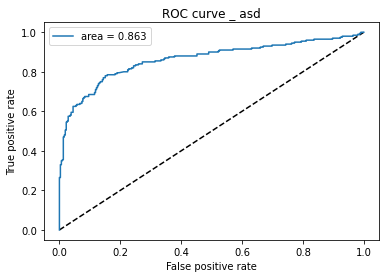

area under ROC curve for val: 0.8626201923076922
|  25       |  0.8626   |  5.319    |  5.092    |  5.074    |  5.154    |  3.923    |  7.228    |  4.095    |  3.72     |  3.978    |  4.825    |  0.1411   |  6.562    |  5.438    |  6.916    |  7.988    |  4.197    |  3.842    |  2.605    |  2.802    |  4.578    |  4.799    |  5.159    |  2.95     |  4.293    |  3.995    |  5.23     |  5.398    |  4.797    |  4.985    |
Epoch 1/60
33/33 - 5s - loss: 0.6578 - masked_accuracy: 0.6150 - val_loss: 0.6329 - val_masked_accuracy: 0.6761
Epoch 2/60
33/33 - 3s - loss: 0.5949 - masked_accuracy: 0.7020 - val_loss: 0.5701 - val_masked_accuracy: 0.7248
Epoch 3/60
33/33 - 3s - loss: 0.5292 - masked_accuracy: 0.7458 - val_loss: 0.5475 - val_masked_accuracy: 0.7163
Epoch 4/60
33/33 - 3s - loss: 0.4702 - masked_accuracy: 0.7818 - val_loss: 0.4911 - val_masked_accuracy: 0.7786
Epoch 5/60
33/33 - 3s - loss: 0.4156 - masked_accuracy: 0.8147 - val_loss: 0.5018 - val_masked_accuracy: 0.7547
Epoch 6/60
33/33 

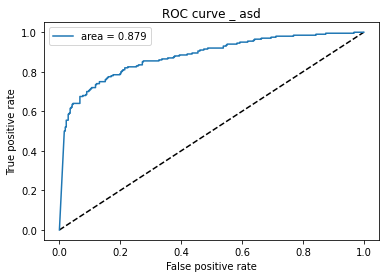

area under ROC curve for val: 0.8789262820512821
|  26       |  0.8789   |  7.416    |  5.541    |  6.156    |  5.883    |  2.876    |  5.922    |  1.74     |  4.294    |  2.729    |  3.4      |  0.2317   |  5.179    |  5.377    |  6.906    |  5.513    |  5.177    |  3.391    |  3.901    |  4.006    |  3.855    |  5.267    |  3.56     |  4.422    |  5.979    |  5.538    |  4.409    |  5.075    |  5.432    |  4.851    |
Epoch 1/60
33/33 - 4s - loss: 0.6554 - masked_accuracy: 0.6132 - val_loss: 0.6237 - val_masked_accuracy: 0.6879
Epoch 2/60
33/33 - 3s - loss: 0.5901 - masked_accuracy: 0.7011 - val_loss: 0.5884 - val_masked_accuracy: 0.7065
Epoch 3/60
33/33 - 3s - loss: 0.5598 - masked_accuracy: 0.7264 - val_loss: 0.5470 - val_masked_accuracy: 0.7202
Epoch 4/60
33/33 - 3s - loss: 0.5247 - masked_accuracy: 0.7511 - val_loss: 0.5137 - val_masked_accuracy: 0.7586
Epoch 5/60
33/33 - 3s - loss: 0.4845 - masked_accuracy: 0.7686 - val_loss: 0.4963 - val_masked_accuracy: 0.7548
Epoch 6/60
33/33 

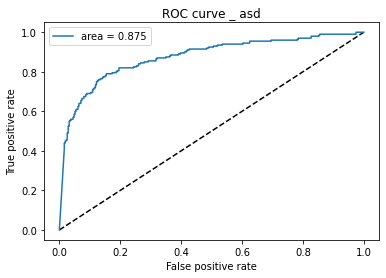

area under ROC curve for val: 0.874863782051282
|  27       |  0.8749   |  8.062    |  7.987    |  4.261    |  5.01     |  3.454    |  6.239    |  3.233    |  4.031    |  5.258    |  4.637    |  0.4683   |  6.581    |  4.455    |  7.518    |  7.085    |  4.264    |  2.138    |  2.657    |  3.417    |  5.296    |  4.792    |  5.531    |  4.491    |  3.373    |  5.763    |  4.914    |  3.335    |  5.131    |  5.21     |
Epoch 1/60
33/33 - 8s - loss: 0.6688 - masked_accuracy: 0.5905 - val_loss: 0.6250 - val_masked_accuracy: 0.6795
Epoch 2/60
33/33 - 5s - loss: 0.6028 - masked_accuracy: 0.7017 - val_loss: 0.5862 - val_masked_accuracy: 0.6969
Epoch 3/60
33/33 - 5s - loss: 0.5533 - masked_accuracy: 0.7351 - val_loss: 0.5683 - val_masked_accuracy: 0.7136
Epoch 4/60
33/33 - 4s - loss: 0.5189 - masked_accuracy: 0.7514 - val_loss: 0.5266 - val_masked_accuracy: 0.7300
Epoch 5/60
33/33 - 4s - loss: 0.4522 - masked_accuracy: 0.7930 - val_loss: 0.4933 - val_masked_accuracy: 0.7554
Epoch 6/60
33/33 -

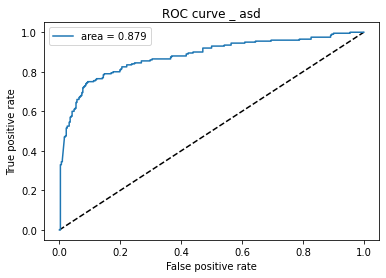

area under ROC curve for val: 0.879198717948718
|  28       |  0.8792   |  7.449    |  3.91     |  7.332    |  6.393    |  1.039    |  4.316    |  3.133    |  2.666    |  5.099    |  4.855    |  0.2639   |  5.868    |  6.842    |  5.549    |  6.517    |  6.12     |  2.784    |  4.342    |  2.705    |  5.158    |  4.765    |  6.023    |  4.789    |  3.997    |  5.639    |  3.489    |  3.556    |  4.328    |  6.097    |
Epoch 1/60
33/33 - 2s - loss: 0.6592 - masked_accuracy: 0.6073 - val_loss: 0.6362 - val_masked_accuracy: 0.6657
Epoch 2/60
33/33 - 1s - loss: 0.5962 - masked_accuracy: 0.7166 - val_loss: 0.5915 - val_masked_accuracy: 0.7150
Epoch 3/60
33/33 - 2s - loss: 0.5351 - masked_accuracy: 0.7428 - val_loss: 0.5033 - val_masked_accuracy: 0.7582
Epoch 4/60
33/33 - 2s - loss: 0.4799 - masked_accuracy: 0.7821 - val_loss: 0.4616 - val_masked_accuracy: 0.7845
Epoch 5/60
33/33 - 2s - loss: 0.4684 - masked_accuracy: 0.7837 - val_loss: 0.4467 - val_masked_accuracy: 0.8092
Epoch 6/60
33/33 -

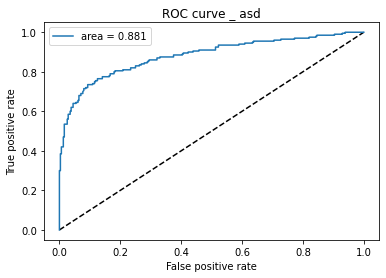

area under ROC curve for val: 0.8808573717948718
|  29       |  0.8809   |  4.539    |  4.843    |  3.737    |  3.633    |  1.219    |  1.118    |  3.051    |  2.797    |  7.255    |  3.545    |  0.4865   |  7.665    |  5.77     |  5.256    |  5.736    |  5.536    |  3.0      |  2.676    |  3.6      |  4.777    |  5.037    |  4.448    |  3.971    |  3.582    |  5.405    |  3.827    |  5.856    |  4.018    |  3.802    |
Epoch 1/60
33/33 - 5s - loss: 0.6802 - masked_accuracy: 0.5831 - val_loss: 0.6768 - val_masked_accuracy: 0.5908
Epoch 2/60
33/33 - 3s - loss: 0.6287 - masked_accuracy: 0.6479 - val_loss: 0.5960 - val_masked_accuracy: 0.7197
Epoch 3/60
33/33 - 4s - loss: 0.5466 - masked_accuracy: 0.7240 - val_loss: 0.5602 - val_masked_accuracy: 0.7014
Epoch 4/60
33/33 - 3s - loss: 0.4760 - masked_accuracy: 0.7577 - val_loss: 0.5035 - val_masked_accuracy: 0.7308
Epoch 5/60
33/33 - 3s - loss: 0.4221 - masked_accuracy: 0.7932 - val_loss: 0.5012 - val_masked_accuracy: 0.7749
Epoch 6/60
33/33 

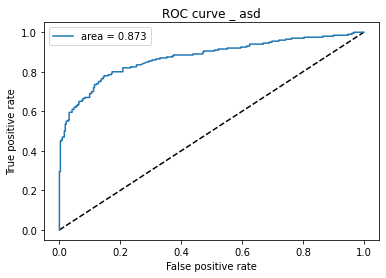

area under ROC curve for val: 0.8734695512820513
|  30       |  0.8735   |  7.421    |  7.274    |  5.763    |  3.237    |  1.211    |  5.012    |  2.406    |  2.469    |  3.942    |  2.151    |  0.106    |  4.566    |  6.704    |  4.547    |  6.345    |  7.655    |  4.618    |  3.774    |  3.716    |  5.436    |  5.339    |  4.851    |  4.521    |  5.184    |  5.546    |  4.468    |  3.327    |  5.18     |  3.606    |
Iteration 0: 
	{'target': 0.8678685897435897, 'params': {'LSTM1': 3.9025584338585326, 'LSTM2': 6.086336352783539, 'LSTM3': 0.9008234986848832, 'LSTM4': 3.076794522949246, 'LSTM5': 1.956642413883214, 'dense_1_neurons_x128': 1.5648378823353442, 'dense_2_neurons_x128': 2.2410735219192306, 'dense_3_neurons_x128': 3.3880372347099432, 'dense_4_neurons_x128': 3.756725814460823, 'dense_5_neurons_x128': 4.77948048482417, 'dropout2_rate': 0.26767780576131794, 'filterCNN1': 6.777921901666389, 'filterCNN2': 4.758699448872373, 'filterCNN3': 7.58809323284197, 'filterCNN4': 4.015027891

<Figure size 432x288 with 0 Axes>

In [20]:
df_train, labels = data_preprocess.process(38, gene_dataset=True)

limited=False
portion=0.1

X, y, FrameSize = model_gene_based.prepare_data(df_train, labels)
X2 = X
y2 = y
j = 0
print("drug: " + str(j))
tmp = []
tmp_x = []
dele = []
for k in range(0, len(y2)):
    if y2[k][j] == 1 or y2[k][j] == 0:
        tmp.append(y2[k][j])
        tmp_x.append(X2[k])
y = tmp
X = tmp_x
i = 3
print("fold: " + str(i))
length = int(len(X) / 10)
if i == 0:
    X_train = X[length:]
    X_test = X[0:length]
    y_train = y[length:]
    y_test = y[0:length]
elif i != 9:
    X_train = np.append(X[0:length * i], X[length * (i + 1):], axis=0)
    X_test = X[length * i:length * (i + 1)]
    y_train = np.append(y[0:length * i], y[length * (i + 1):], axis=0)
    y_test = y[length * i:length * (i + 1)]
else:
    X_train = X[0:length * i]
    X_test = X[length * i:]
    y_train = y[0:length * i]
    y_test = y[length * i:]

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=False)
Bayesian_optimizer.BO(X_train, X_test, X_val, y_train, y_test, y_val, limited, portion)


label set: (22376, 12)
train set: (7845, 3979)
drug: 11
fold: 3
Epoch 1/60
13/13 - 1s - loss: 0.6447 - masked_accuracy: 0.7097 - val_loss: 0.5438 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 0s - loss: 0.6023 - masked_accuracy: 0.7111 - val_loss: 0.5260 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 0s - loss: 0.5757 - masked_accuracy: 0.7117 - val_loss: 0.4841 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 0s - loss: 0.5441 - masked_accuracy: 0.7175 - val_loss: 0.4739 - val_masked_accuracy: 0.7945
Epoch 5/60
13/13 - 0s - loss: 0.5162 - masked_accuracy: 0.7561 - val_loss: 0.4334 - val_masked_accuracy: 0.7841
Epoch 6/60
13/13 - 0s - loss: 0.4726 - masked_accuracy: 0.7876 - val_loss: 0.4322 - val_masked_accuracy: 0.8192
Epoch 7/60
13/13 - 0s - loss: 0.4494 - masked_accuracy: 0.7891 - val_loss: 0.4301 - val_masked_accuracy: 0.8322
Epoch 8/60
13/13 - 0s - loss: 0.4230 - masked_accuracy: 0.8074 - val_loss: 0.4411 - val_masked_accuracy: 0.8270
Epoch 9/60
13/13 - 0s - loss: 0.3819 - m

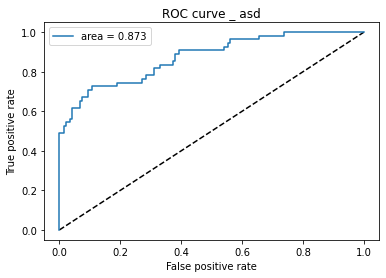

area under ROC curve for val: 0.8732186732186732
|   iter    |  target   |   LSTM1   |   LSTM2   |   LSTM3   |   LSTM4   |   LSTM5   | dense_... | dense_... | dense_... | dense_... | dense_... | dropou... | filter... | filter... | filter... | filter... | filter... |    i1     |    i2     |    i3     | kernel... | kernel... | kernel... | kernel... | kernel... | poolCNN1  | poolCNN2  | poolCNN3  | poolCNN4  | poolCNN5  |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/60
13/13 - 1s - loss: 0.6454 - masked_accuracy: 0.6918 - val_loss: 0.5505 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 0s - loss: 0.6028 - masked_accuracy: 0.7116 - val_loss: 0.5507 - val_mas

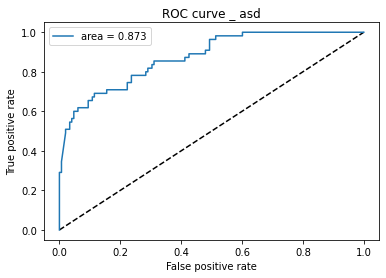

area under ROC curve for val: 0.8727272727272728
|  1        |  0.8727   |  3.903    |  6.086    |  0.9008   |  3.077    |  1.957    |  1.565    |  2.241    |  3.388    |  3.757    |  4.779    |  0.2677   |  6.778    |  4.759    |  7.588    |  4.015    |  6.716    |  3.235    |  3.688    |  2.349    |  3.534    |  5.462    |  5.998    |  3.903    |  5.115    |  5.704    |  5.763    |  3.172    |  3.025    |  3.443    |
Epoch 1/60
13/13 - 2s - loss: 0.6322 - masked_accuracy: 0.7007 - val_loss: 0.5461 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6097 - masked_accuracy: 0.7114 - val_loss: 0.5598 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5933 - masked_accuracy: 0.7120 - val_loss: 0.5215 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5604 - masked_accuracy: 0.7130 - val_loss: 0.5104 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5381 - masked_accuracy: 0.7148 - val_loss: 0.4962 - val_masked_accuracy: 0.8231
Epoch 6/60
13/13 

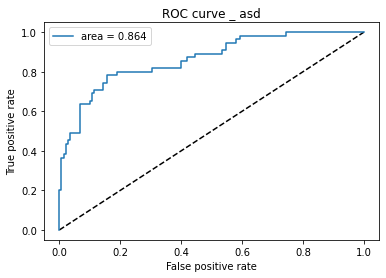

area under ROC curve for val: 0.8636363636363636
|  2        |  0.8636   |  7.223    |  1.608    |  3.932    |  7.797    |  4.739    |  5.882    |  3.172    |  5.843    |  6.909    |  1.032    |  0.4001   |  8.053    |  7.042    |  5.078    |  7.215    |  4.334    |  3.333    |  4.808    |  2.84     |  3.821    |  3.316    |  2.962    |  5.072    |  3.577    |  3.75     |  4.473    |  3.071    |  4.737    |  3.37     |
Epoch 1/60
13/13 - 1s - loss: 0.6273 - masked_accuracy: 0.6975 - val_loss: 0.5594 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5967 - masked_accuracy: 0.7118 - val_loss: 0.5447 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5869 - masked_accuracy: 0.7117 - val_loss: 0.5356 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5623 - masked_accuracy: 0.7119 - val_loss: 0.5266 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5454 - masked_accuracy: 0.7124 - val_loss: 0.5055 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

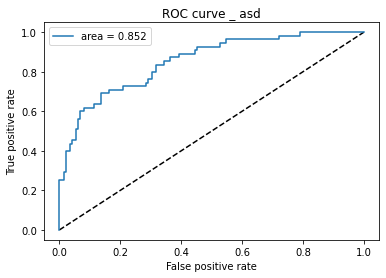

area under ROC curve for val: 0.8524570024570024
|  3        |  0.8525   |  5.143    |  5.938    |  1.637    |  3.881    |  5.9      |  3.882    |  1.26     |  4.758    |  5.679    |  4.607    |  0.4778   |  6.364    |  7.694    |  4.477    |  4.485    |  7.291    |  3.173    |  2.429    |  4.868    |  4.013    |  5.303    |  5.223    |  5.727    |  4.896    |  5.303    |  4.016    |  3.764    |  5.767    |  4.27     |
Epoch 1/60
13/13 - 3s - loss: 0.6371 - masked_accuracy: 0.6956 - val_loss: 0.5590 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6070 - masked_accuracy: 0.7117 - val_loss: 0.5474 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5912 - masked_accuracy: 0.7115 - val_loss: 0.4892 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5543 - masked_accuracy: 0.7121 - val_loss: 0.4965 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5438 - masked_accuracy: 0.7120 - val_loss: 0.4975 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

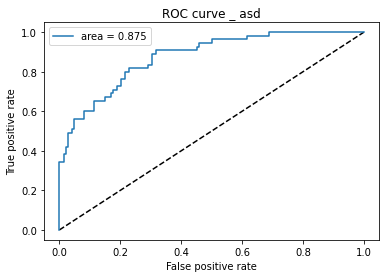

area under ROC curve for val: 0.8754299754299754
|  4        |  0.8754   |  7.847    |  5.677    |  5.376    |  1.726    |  7.736    |  4.139    |  5.064    |  3.839    |  2.607    |  7.404    |  0.3295   |  3.912    |  6.492    |  5.272    |  6.114    |  7.621    |  3.043    |  4.807    |  3.895    |  2.951    |  5.874    |  5.111    |  6.091    |  3.451    |  3.339    |  5.884    |  5.13     |  3.111    |  5.317    |
Epoch 1/60
13/13 - 1s - loss: 0.6288 - masked_accuracy: 0.6992 - val_loss: 0.5467 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 0s - loss: 0.5939 - masked_accuracy: 0.7115 - val_loss: 0.5443 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 0s - loss: 0.5700 - masked_accuracy: 0.7114 - val_loss: 0.5350 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 0s - loss: 0.5481 - masked_accuracy: 0.7178 - val_loss: 0.4883 - val_masked_accuracy: 0.7841
Epoch 5/60
13/13 - 0s - loss: 0.5134 - masked_accuracy: 0.7588 - val_loss: 0.4915 - val_masked_accuracy: 0.7918
Epoch 6/60
13/13 

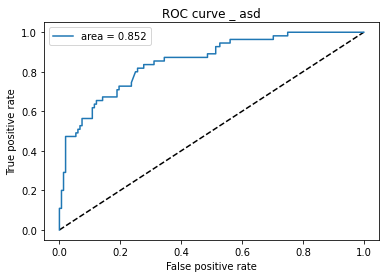

area under ROC curve for val: 0.8523341523341523
|  5        |  0.8523   |  6.328    |  7.546    |  6.023    |  1.795    |  1.043    |  1.089    |  1.104    |  2.673    |  7.092    |  4.78     |  0.3211   |  7.437    |  4.422    |  5.073    |  6.36     |  7.972    |  3.695    |  1.96     |  4.462    |  3.646    |  5.483    |  4.141    |  5.663    |  5.291    |  4.68     |  3.337    |  3.092    |  3.288    |  3.043    |
Epoch 1/60
13/13 - 2s - loss: 0.6214 - masked_accuracy: 0.7034 - val_loss: 0.5650 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6044 - masked_accuracy: 0.7116 - val_loss: 0.5470 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5990 - masked_accuracy: 0.7117 - val_loss: 0.5256 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5728 - masked_accuracy: 0.7093 - val_loss: 0.5393 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5460 - masked_accuracy: 0.7124 - val_loss: 0.4799 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

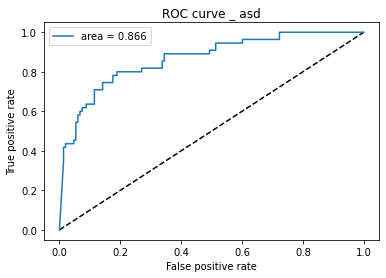

area under ROC curve for val: 0.8662162162162163
|  6        |  0.8662   |  1.674    |  2.525    |  6.034    |  4.93     |  0.9904   |  1.418    |  7.864    |  4.99     |  2.364    |  2.717    |  0.3975   |  4.721    |  6.342    |  7.974    |  7.457    |  4.907    |  3.48     |  3.884    |  4.553    |  3.402    |  2.959    |  3.124    |  4.456    |  4.84     |  4.72     |  3.916    |  6.064    |  4.755    |  4.116    |
Epoch 1/60
13/13 - 1s - loss: 0.6132 - masked_accuracy: 0.7054 - val_loss: 0.5340 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5692 - masked_accuracy: 0.7139 - val_loss: 0.5376 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5347 - masked_accuracy: 0.7159 - val_loss: 0.4859 - val_masked_accuracy: 0.7880
Epoch 4/60
13/13 - 1s - loss: 0.5013 - masked_accuracy: 0.7593 - val_loss: 0.4950 - val_masked_accuracy: 0.7984
Epoch 5/60
13/13 - 1s - loss: 0.4775 - masked_accuracy: 0.7695 - val_loss: 0.4596 - val_masked_accuracy: 0.8010
Epoch 6/60
13/13 

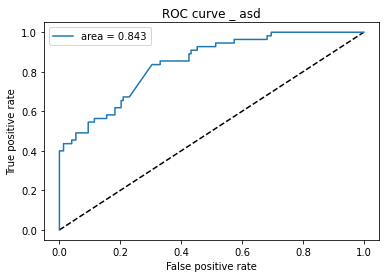

area under ROC curve for val: 0.8428132678132678
|  7        |  0.8428   |  4.867    |  6.266    |  5.718    |  2.807    |  1.378    |  3.565    |  5.434    |  2.413    |  6.32     |  1.379    |  0.2041   |  7.28     |  4.712    |  6.586    |  6.104    |  7.784    |  2.743    |  2.111    |  4.252    |  5.371    |  5.805    |  5.882    |  2.945    |  3.65     |  4.874    |  5.937    |  5.941    |  4.681    |  5.83     |
Epoch 1/60
13/13 - 1s - loss: 0.6187 - masked_accuracy: 0.6876 - val_loss: 0.5124 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5482 - masked_accuracy: 0.7277 - val_loss: 0.4374 - val_masked_accuracy: 0.7971
Epoch 3/60
13/13 - 1s - loss: 0.5117 - masked_accuracy: 0.7564 - val_loss: 0.4225 - val_masked_accuracy: 0.7932
Epoch 4/60
13/13 - 1s - loss: 0.4660 - masked_accuracy: 0.7824 - val_loss: 0.4094 - val_masked_accuracy: 0.8231
Epoch 5/60
13/13 - 1s - loss: 0.4256 - masked_accuracy: 0.8024 - val_loss: 0.3847 - val_masked_accuracy: 0.8387
Epoch 6/60
13/13 

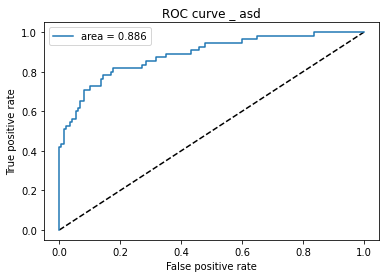

area under ROC curve for val: 0.8864864864864864
|  8        |  0.8865   |  5.519    |  3.708    |  4.399    |  5.251    |  4.857    |  7.569    |  7.515    |  3.743    |  7.835    |  2.152    |  0.1505   |  4.467    |  6.024    |  3.99     |  7.881    |  7.374    |  1.948    |  2.464    |  2.963    |  3.319    |  5.49     |  4.003    |  5.908    |  4.762    |  5.712    |  5.603    |  5.797    |  4.372    |  4.648    |
Epoch 1/60
13/13 - 2s - loss: 0.6506 - masked_accuracy: 0.6989 - val_loss: 0.5525 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6015 - masked_accuracy: 0.7111 - val_loss: 0.5499 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6017 - masked_accuracy: 0.7113 - val_loss: 0.5531 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.6020 - masked_accuracy: 0.7126 - val_loss: 0.5515 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.6012 - masked_accuracy: 0.7113 - val_loss: 0.5499 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

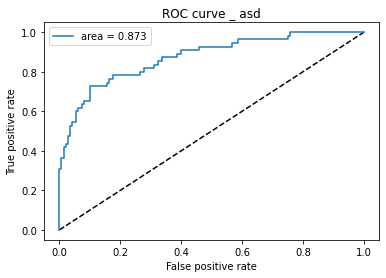

area under ROC curve for val: 0.8732186732186733
|  9        |  0.8732   |  6.65     |  2.957    |  4.43     |  5.214    |  1.012    |  5.173    |  4.022    |  6.713    |  3.17     |  7.329    |  0.3311   |  4.673    |  7.209    |  6.471    |  4.126    |  5.665    |  4.073    |  4.84     |  1.901    |  6.026    |  4.105    |  6.016    |  4.835    |  5.552    |  4.739    |  4.91     |  3.814    |  4.778    |  5.3      |
Epoch 1/60
13/13 - 1s - loss: 0.6159 - masked_accuracy: 0.7029 - val_loss: 0.5605 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5855 - masked_accuracy: 0.7116 - val_loss: 0.5305 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5694 - masked_accuracy: 0.7113 - val_loss: 0.5163 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5367 - masked_accuracy: 0.7168 - val_loss: 0.4561 - val_masked_accuracy: 0.8127
Epoch 5/60
13/13 - 1s - loss: 0.5036 - masked_accuracy: 0.7394 - val_loss: 0.4062 - val_masked_accuracy: 0.8218
Epoch 6/60
13/13 

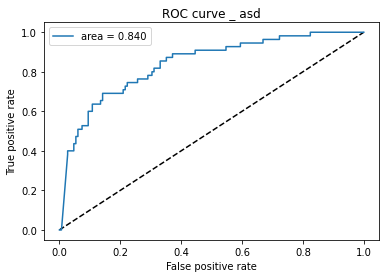

area under ROC curve for val: 0.8401105651105651
|  10       |  0.8401   |  7.08     |  6.337    |  5.926    |  7.124    |  3.223    |  5.73     |  4.146    |  3.651    |  3.858    |  3.791    |  0.227    |  6.512    |  5.707    |  7.99     |  6.747    |  4.734    |  3.265    |  2.999    |  4.452    |  5.716    |  5.792    |  5.021    |  3.765    |  3.708    |  5.636    |  4.589    |  5.467    |  4.732    |  5.246    |
Epoch 1/60
13/13 - 1s - loss: 0.6383 - masked_accuracy: 0.6950 - val_loss: 0.5427 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5967 - masked_accuracy: 0.7110 - val_loss: 0.5426 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5747 - masked_accuracy: 0.7123 - val_loss: 0.5175 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5543 - masked_accuracy: 0.7116 - val_loss: 0.4985 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5374 - masked_accuracy: 0.7149 - val_loss: 0.4519 - val_masked_accuracy: 0.7698
Epoch 6/60
13/13 

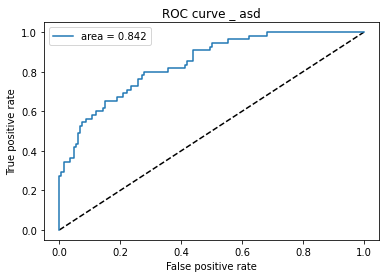

area under ROC curve for val: 0.8417690417690418
|  11       |  0.8418   |  4.637    |  6.45     |  4.996    |  4.253    |  3.367    |  1.391    |  3.621    |  1.473    |  7.976    |  2.208    |  0.4247   |  7.575    |  6.791    |  6.292    |  4.576    |  5.861    |  3.005    |  2.62     |  3.796    |  3.899    |  5.832    |  5.811    |  3.723    |  3.255    |  3.517    |  4.499    |  5.231    |  3.566    |  3.694    |
Epoch 1/60
13/13 - 1s - loss: 0.6302 - masked_accuracy: 0.6954 - val_loss: 0.5613 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5803 - masked_accuracy: 0.7110 - val_loss: 0.4984 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5640 - masked_accuracy: 0.7114 - val_loss: 0.5022 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5531 - masked_accuracy: 0.7113 - val_loss: 0.4705 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5324 - masked_accuracy: 0.7114 - val_loss: 0.4678 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

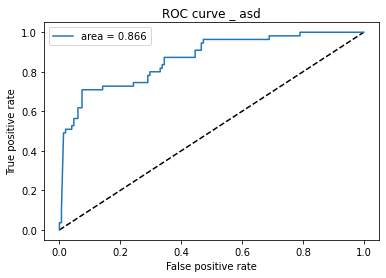

area under ROC curve for val: 0.8664004914004914
|  12       |  0.8664   |  7.032    |  3.894    |  5.34     |  2.582    |  1.634    |  4.614    |  4.335    |  1.999    |  5.377    |  4.817    |  0.3617   |  4.507    |  7.056    |  4.833    |  6.081    |  7.198    |  1.971    |  2.938    |  4.693    |  5.603    |  4.623    |  5.673    |  5.939    |  5.545    |  5.633    |  3.216    |  4.984    |  5.151    |  4.853    |
Epoch 1/60
13/13 - 2s - loss: 0.6218 - masked_accuracy: 0.7015 - val_loss: 0.5897 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6096 - masked_accuracy: 0.7112 - val_loss: 0.5716 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6097 - masked_accuracy: 0.7113 - val_loss: 0.5585 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.6057 - masked_accuracy: 0.7120 - val_loss: 0.5457 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.6065 - masked_accuracy: 0.7113 - val_loss: 0.5671 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

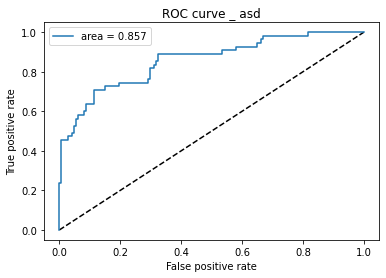

area under ROC curve for val: 0.8573710073710074
|  13       |  0.8574   |  6.657    |  1.149    |  6.446    |  6.168    |  2.77     |  2.751    |  5.453    |  3.386    |  6.635    |  4.112    |  0.4131   |  8.06     |  5.161    |  4.501    |  7.685    |  6.175    |  5.019    |  3.937    |  5.081    |  4.647    |  4.585    |  3.333    |  4.038    |  2.984    |  3.413    |  5.286    |  2.997    |  4.073    |  5.66     |
Epoch 1/60
13/13 - 2s - loss: 0.6163 - masked_accuracy: 0.6991 - val_loss: 0.5154 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5710 - masked_accuracy: 0.7108 - val_loss: 0.4785 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5439 - masked_accuracy: 0.7108 - val_loss: 0.4578 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5055 - masked_accuracy: 0.7258 - val_loss: 0.4102 - val_masked_accuracy: 0.8036
Epoch 5/60
13/13 - 1s - loss: 0.4765 - masked_accuracy: 0.7573 - val_loss: 0.4633 - val_masked_accuracy: 0.8127
Epoch 6/60
13/13 

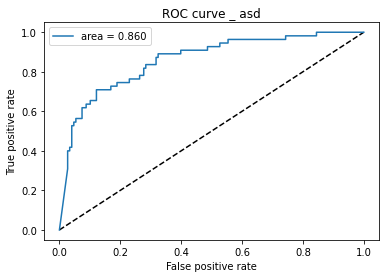

area under ROC curve for val: 0.8595823095823096
|  14       |  0.8596   |  5.887    |  5.875    |  2.258    |  4.082    |  5.087    |  8.026    |  2.368    |  2.684    |  2.788    |  6.301    |  0.2828   |  4.139    |  6.036    |  4.79     |  7.254    |  5.149    |  1.988    |  3.799    |  4.6      |  4.119    |  5.3      |  4.536    |  4.631    |  5.97     |  5.473    |  3.003    |  5.17     |  4.388    |  5.932    |
Epoch 1/60
13/13 - 1s - loss: 0.6355 - masked_accuracy: 0.6924 - val_loss: 0.5692 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 0s - loss: 0.5872 - masked_accuracy: 0.7120 - val_loss: 0.4995 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 0s - loss: 0.5642 - masked_accuracy: 0.7123 - val_loss: 0.4642 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 0s - loss: 0.5391 - masked_accuracy: 0.7120 - val_loss: 0.4307 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 0s - loss: 0.5230 - masked_accuracy: 0.7366 - val_loss: 0.4162 - val_masked_accuracy: 0.7997
Epoch 6/60
13/13 

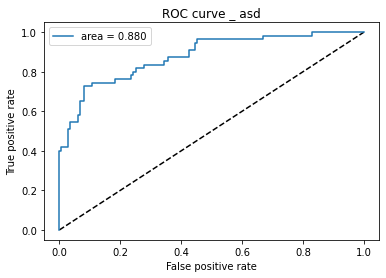

area under ROC curve for val: 0.8796068796068796
|  15       |  0.8796   |  2.494    |  2.823    |  1.487    |  3.986    |  1.685    |  5.463    |  6.681    |  5.917    |  6.417    |  3.366    |  0.4383   |  5.701    |  7.361    |  6.531    |  4.502    |  4.229    |  1.959    |  2.114    |  3.367    |  3.263    |  2.989    |  5.316    |  4.164    |  5.29     |  4.348    |  4.34     |  4.43     |  4.417    |  5.47     |
Epoch 1/60
13/13 - 1s - loss: 0.6444 - masked_accuracy: 0.7040 - val_loss: 0.5332 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5958 - masked_accuracy: 0.7109 - val_loss: 0.5193 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5620 - masked_accuracy: 0.7117 - val_loss: 0.4690 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5467 - masked_accuracy: 0.7121 - val_loss: 0.4647 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5143 - masked_accuracy: 0.7132 - val_loss: 0.4269 - val_masked_accuracy: 0.8309
Epoch 6/60
13/13 

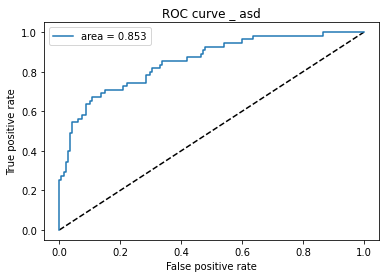

area under ROC curve for val: 0.8528255528255528
|  16       |  0.8528   |  4.585    |  1.577    |  2.922    |  3.881    |  3.746    |  7.524    |  8.1      |  5.483    |  6.777    |  3.937    |  0.2188   |  3.9      |  6.867    |  4.231    |  6.627    |  6.816    |  1.9      |  3.186    |  1.9      |  2.9      |  3.972    |  4.417    |  6.1      |  5.74     |  5.277    |  5.663    |  5.109    |  3.872    |  4.703    |
Epoch 1/60
13/13 - 2s - loss: 0.6363 - masked_accuracy: 0.6950 - val_loss: 0.5844 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6061 - masked_accuracy: 0.7114 - val_loss: 0.5419 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5775 - masked_accuracy: 0.7112 - val_loss: 0.5196 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5522 - masked_accuracy: 0.7114 - val_loss: 0.4868 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5201 - masked_accuracy: 0.7361 - val_loss: 0.3994 - val_masked_accuracy: 0.8296
Epoch 6/60
13/13 

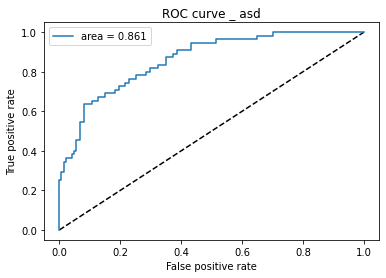

area under ROC curve for val: 0.8614250614250614
|  17       |  0.8614   |  4.242    |  7.673    |  1.94     |  3.49     |  2.599    |  1.611    |  5.845    |  7.717    |  2.824    |  3.653    |  0.3247   |  4.272    |  8.016    |  5.239    |  8.091    |  5.642    |  3.412    |  3.591    |  4.833    |  5.372    |  4.517    |  5.873    |  3.999    |  5.309    |  3.869    |  3.638    |  4.126    |  5.707    |  5.361    |
Epoch 1/60
13/13 - 1s - loss: 0.6364 - masked_accuracy: 0.6967 - val_loss: 0.5434 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 0s - loss: 0.6018 - masked_accuracy: 0.7114 - val_loss: 0.5539 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 0s - loss: 0.5865 - masked_accuracy: 0.7112 - val_loss: 0.5259 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 0s - loss: 0.5661 - masked_accuracy: 0.7113 - val_loss: 0.5247 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 0s - loss: 0.5539 - masked_accuracy: 0.7107 - val_loss: 0.5144 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

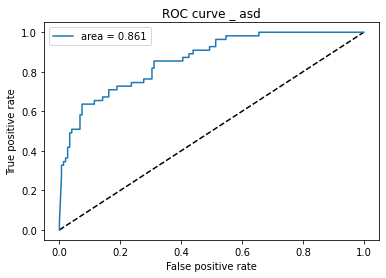

area under ROC curve for val: 0.8607493857493856
|  18       |  0.8607   |  1.609    |  3.405    |  2.811    |  1.243    |  6.759    |  1.803    |  6.304    |  4.586    |  3.15     |  6.805    |  0.4523   |  5.847    |  7.727    |  4.252    |  6.966    |  4.242    |  3.8      |  2.412    |  2.94     |  4.713    |  4.331    |  3.122    |  4.243    |  2.968    |  2.96     |  5.0      |  3.096    |  3.973    |  3.273    |
Epoch 1/60
13/13 - 2s - loss: 0.6232 - masked_accuracy: 0.6988 - val_loss: 0.5654 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6056 - masked_accuracy: 0.7122 - val_loss: 0.5492 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6002 - masked_accuracy: 0.7110 - val_loss: 0.5593 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.6030 - masked_accuracy: 0.7109 - val_loss: 0.5445 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5783 - masked_accuracy: 0.7111 - val_loss: 0.5368 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

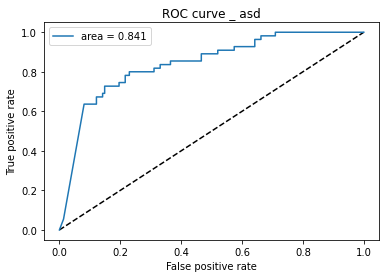

area under ROC curve for val: 0.8406633906633907
|  19       |  0.8407   |  1.941    |  7.87     |  6.829    |  4.243    |  4.972    |  1.975    |  7.243    |  2.862    |  2.764    |  5.275    |  0.1392   |  4.223    |  4.059    |  7.609    |  7.0      |  6.6      |  4.672    |  3.696    |  4.945    |  3.108    |  5.736    |  5.443    |  3.731    |  5.905    |  3.016    |  5.533    |  4.917    |  4.529    |  4.998    |
Epoch 1/60
13/13 - 1s - loss: 0.6395 - masked_accuracy: 0.6901 - val_loss: 0.5445 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 0s - loss: 0.6036 - masked_accuracy: 0.7118 - val_loss: 0.5582 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 0s - loss: 0.5956 - masked_accuracy: 0.7112 - val_loss: 0.5259 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 0s - loss: 0.5646 - masked_accuracy: 0.7128 - val_loss: 0.4932 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 0s - loss: 0.5416 - masked_accuracy: 0.7227 - val_loss: 0.4634 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

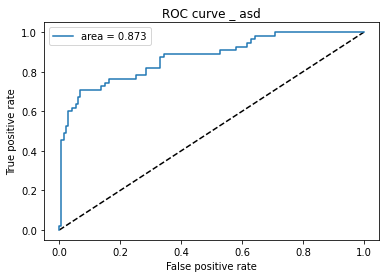

area under ROC curve for val: 0.8728501228501228
|  20       |  0.8729   |  2.124    |  2.227    |  1.33     |  1.483    |  4.689    |  4.985    |  1.844    |  4.629    |  7.074    |  6.993    |  0.2381   |  7.588    |  7.802    |  5.755    |  4.547    |  4.844    |  4.209    |  3.365    |  2.854    |  3.785    |  5.471    |  5.279    |  5.685    |  4.655    |  5.938    |  4.964    |  4.384    |  4.88     |  3.647    |
Epoch 1/60
13/13 - 2s - loss: 0.6262 - masked_accuracy: 0.6975 - val_loss: 0.5536 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6094 - masked_accuracy: 0.7123 - val_loss: 0.5471 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6057 - masked_accuracy: 0.7113 - val_loss: 0.5607 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.6003 - masked_accuracy: 0.7118 - val_loss: 0.5208 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5677 - masked_accuracy: 0.7126 - val_loss: 0.4573 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

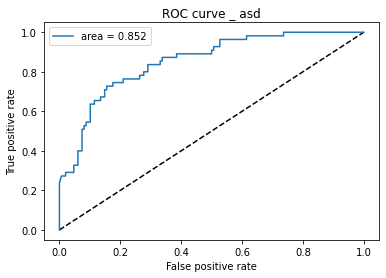

area under ROC curve for val: 0.8515970515970516
|  21       |  0.8516   |  1.861    |  1.742    |  0.9178   |  6.271    |  3.125    |  3.842    |  5.937    |  1.71     |  7.765    |  2.938    |  0.4679   |  6.21     |  7.979    |  3.955    |  5.309    |  6.201    |  2.087    |  4.719    |  4.739    |  6.041    |  4.328    |  4.454    |  5.008    |  5.49     |  2.934    |  3.395    |  3.189    |  3.817    |  5.208    |
Epoch 1/60
13/13 - 3s - loss: 0.6448 - masked_accuracy: 0.6998 - val_loss: 0.5477 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6046 - masked_accuracy: 0.7114 - val_loss: 0.5582 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6031 - masked_accuracy: 0.7125 - val_loss: 0.5536 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5991 - masked_accuracy: 0.7114 - val_loss: 0.5276 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5690 - masked_accuracy: 0.7110 - val_loss: 0.5157 - val_masked_accuracy: 0.8101
Epoch 6/60
13/13 

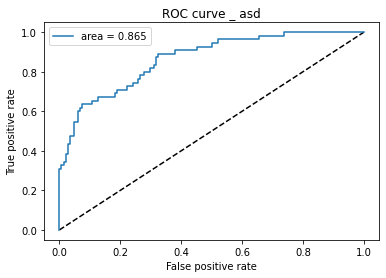

area under ROC curve for val: 0.8653562653562653
|  22       |  0.8654   |  7.729    |  6.513    |  6.528    |  4.186    |  3.78     |  1.938    |  1.688    |  4.958    |  1.333    |  5.777    |  0.1771   |  4.453    |  7.094    |  5.981    |  5.997    |  6.281    |  4.405    |  4.386    |  3.539    |  2.95     |  5.339    |  4.336    |  4.926    |  5.67     |  4.267    |  3.09     |  4.957    |  4.372    |  4.231    |
Epoch 1/60
13/13 - 3s - loss: 0.6263 - masked_accuracy: 0.6957 - val_loss: 0.5528 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6049 - masked_accuracy: 0.7120 - val_loss: 0.5471 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6005 - masked_accuracy: 0.7111 - val_loss: 0.5485 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5872 - masked_accuracy: 0.7113 - val_loss: 0.5354 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5680 - masked_accuracy: 0.7106 - val_loss: 0.5419 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

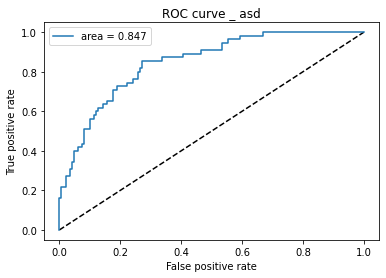

area under ROC curve for val: 0.8474201474201474
|  23       |  0.8474   |  1.144    |  3.943    |  5.429    |  6.38     |  4.336    |  2.736    |  7.391    |  5.729    |  3.949    |  2.931    |  0.4906   |  3.935    |  5.997    |  4.633    |  7.87     |  5.594    |  3.817    |  4.507    |  3.841    |  4.339    |  4.67     |  5.414    |  4.515    |  3.441    |  4.285    |  4.556    |  3.824    |  4.045    |  3.859    |
Epoch 1/60
13/13 - 3s - loss: 0.6302 - masked_accuracy: 0.6968 - val_loss: 0.5714 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6043 - masked_accuracy: 0.7114 - val_loss: 0.5448 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6018 - masked_accuracy: 0.7113 - val_loss: 0.5147 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5673 - masked_accuracy: 0.7116 - val_loss: 0.5038 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5468 - masked_accuracy: 0.7116 - val_loss: 0.5145 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

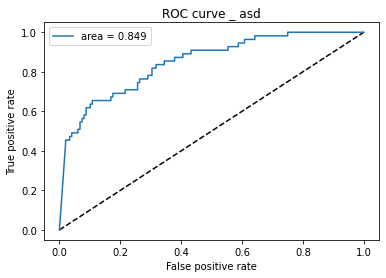

area under ROC curve for val: 0.8485257985257986
|  24       |  0.8485   |  2.137    |  6.935    |  6.002    |  1.925    |  3.205    |  4.221    |  2.755    |  3.706    |  3.276    |  5.123    |  0.2499   |  5.406    |  4.483    |  5.615    |  4.103    |  7.16     |  2.526    |  4.349    |  4.464    |  2.969    |  4.089    |  5.427    |  5.346    |  6.094    |  5.295    |  3.467    |  4.871    |  4.351    |  5.389    |
Epoch 1/60
13/13 - 3s - loss: 0.6316 - masked_accuracy: 0.6959 - val_loss: 0.5452 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6012 - masked_accuracy: 0.7111 - val_loss: 0.5591 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6012 - masked_accuracy: 0.7120 - val_loss: 0.5533 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.6034 - masked_accuracy: 0.7115 - val_loss: 0.5543 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5846 - masked_accuracy: 0.7119 - val_loss: 0.5467 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

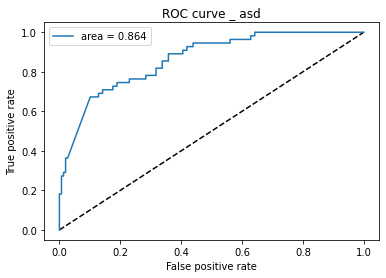

area under ROC curve for val: 0.8638206388206388
|  25       |  0.8638   |  2.118    |  4.377    |  5.886    |  6.953    |  7.786    |  4.949    |  3.952    |  3.93     |  4.922    |  6.638    |  0.4442   |  4.664    |  7.262    |  6.354    |  3.937    |  5.387    |  4.936    |  4.07     |  2.752    |  5.471    |  5.872    |  5.926    |  3.494    |  3.832    |  4.99     |  3.593    |  5.24     |  5.119    |  3.908    |
Epoch 1/60
13/13 - 2s - loss: 0.6291 - masked_accuracy: 0.7003 - val_loss: 0.5659 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6042 - masked_accuracy: 0.7116 - val_loss: 0.5475 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.6023 - masked_accuracy: 0.7121 - val_loss: 0.5528 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.6032 - masked_accuracy: 0.7113 - val_loss: 0.5618 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.6031 - masked_accuracy: 0.7122 - val_loss: 0.5495 - val_masked_accuracy: 0.7750
Epoch 6/60
13/13 

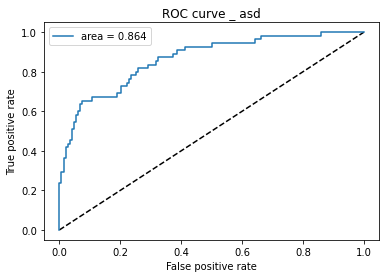

area under ROC curve for val: 0.8644963144963145
|  26       |  0.8645   |  7.035    |  3.061    |  7.784    |  3.748    |  7.948    |  1.093    |  7.432    |  5.795    |  2.397    |  2.572    |  0.4344   |  6.628    |  4.488    |  4.209    |  6.722    |  5.624    |  4.217    |  4.469    |  4.888    |  5.057    |  5.109    |  4.044    |  6.007    |  3.36     |  3.421    |  3.586    |  3.913    |  5.68     |  5.683    |
Epoch 1/60
13/13 - 2s - loss: 0.6379 - masked_accuracy: 0.6978 - val_loss: 0.5480 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5829 - masked_accuracy: 0.7116 - val_loss: 0.4916 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5583 - masked_accuracy: 0.7118 - val_loss: 0.4804 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5389 - masked_accuracy: 0.7124 - val_loss: 0.4561 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5022 - masked_accuracy: 0.7472 - val_loss: 0.4211 - val_masked_accuracy: 0.8517
Epoch 6/60
13/13 

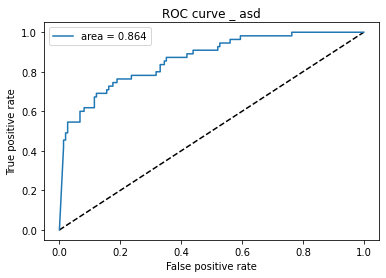

area under ROC curve for val: 0.8641277641277642
|  27       |  0.8641   |  7.243    |  7.469    |  3.259    |  6.463    |  3.186    |  1.329    |  3.646    |  1.637    |  2.313    |  5.139    |  0.286    |  4.138    |  6.034    |  4.242    |  6.19     |  5.294    |  2.195    |  3.23     |  2.627    |  2.972    |  4.493    |  4.381    |  5.619    |  4.688    |  5.637    |  4.795    |  4.749    |  5.766    |  4.166    |
Epoch 1/60
13/13 - 2s - loss: 0.6371 - masked_accuracy: 0.7049 - val_loss: 0.5395 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5813 - masked_accuracy: 0.7124 - val_loss: 0.4919 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5590 - masked_accuracy: 0.7117 - val_loss: 0.4781 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5215 - masked_accuracy: 0.7195 - val_loss: 0.4481 - val_masked_accuracy: 0.8478
Epoch 5/60
13/13 - 1s - loss: 0.4918 - masked_accuracy: 0.7615 - val_loss: 0.4290 - val_masked_accuracy: 0.8296
Epoch 6/60
13/13 

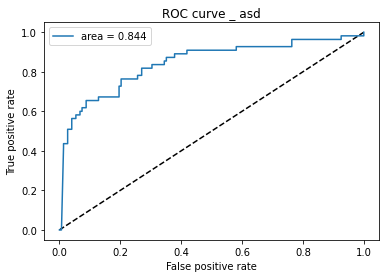

area under ROC curve for val: 0.8436732186732187
|  28       |  0.8437   |  7.209    |  3.255    |  2.372    |  2.515    |  7.147    |  3.624    |  1.686    |  1.247    |  5.312    |  4.618    |  0.1663   |  7.442    |  5.305    |  5.277    |  4.436    |  5.828    |  2.429    |  3.816    |  2.848    |  4.304    |  4.875    |  5.147    |  4.765    |  5.828    |  4.413    |  2.968    |  3.344    |  5.85     |  5.964    |
Epoch 1/60
13/13 - 2s - loss: 0.6241 - masked_accuracy: 0.6984 - val_loss: 0.5841 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.5953 - masked_accuracy: 0.7118 - val_loss: 0.5035 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5509 - masked_accuracy: 0.7105 - val_loss: 0.5287 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5427 - masked_accuracy: 0.7351 - val_loss: 0.4348 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5276 - masked_accuracy: 0.7370 - val_loss: 0.4316 - val_masked_accuracy: 0.8023
Epoch 6/60
13/13 

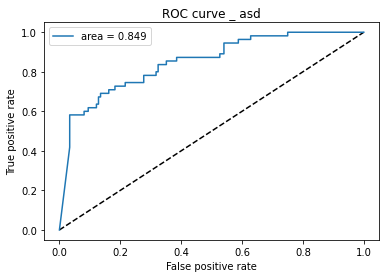

area under ROC curve for val: 0.8488329238329239
|  29       |  0.8488   |  3.628    |  4.972    |  4.956    |  6.85     |  2.477    |  6.501    |  3.874    |  7.596    |  6.173    |  4.926    |  0.1771   |  5.483    |  6.57     |  7.789    |  4.55     |  4.757    |  2.81     |  4.387    |  4.732    |  4.289    |  2.993    |  4.272    |  3.51     |  5.377    |  4.909    |  5.027    |  5.194    |  4.968    |  4.549    |
Epoch 1/60
13/13 - 1s - loss: 0.6345 - masked_accuracy: 0.7052 - val_loss: 0.5445 - val_masked_accuracy: 0.7750
Epoch 2/60
13/13 - 1s - loss: 0.6035 - masked_accuracy: 0.7111 - val_loss: 0.5581 - val_masked_accuracy: 0.7750
Epoch 3/60
13/13 - 1s - loss: 0.5890 - masked_accuracy: 0.7112 - val_loss: 0.5393 - val_masked_accuracy: 0.7750
Epoch 4/60
13/13 - 1s - loss: 0.5590 - masked_accuracy: 0.7120 - val_loss: 0.5011 - val_masked_accuracy: 0.7750
Epoch 5/60
13/13 - 1s - loss: 0.5387 - masked_accuracy: 0.7146 - val_loss: 0.4513 - val_masked_accuracy: 0.7789
Epoch 6/60
13/13 

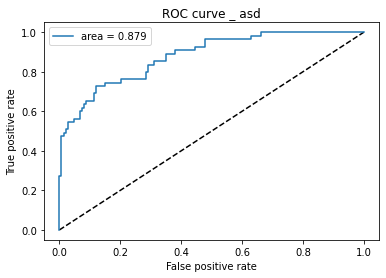

area under ROC curve for val: 0.879115479115479
|  30       |  0.8791   |  4.68     |  2.553    |  5.175    |  7.02     |  4.861    |  2.093    |  0.932    |  7.224    |  1.372    |  6.972    |  0.3159   |  6.239    |  8.085    |  5.04     |  5.981    |  7.04     |  5.06     |  2.7      |  3.795    |  5.507    |  3.198    |  4.159    |  4.999    |  4.967    |  3.35     |  4.208    |  5.878    |  5.136    |  5.06     |
Iteration 0: 
	{'target': 0.8727272727272728, 'params': {'LSTM1': 3.9025584338585326, 'LSTM2': 6.086336352783539, 'LSTM3': 0.9008234986848832, 'LSTM4': 3.076794522949246, 'LSTM5': 1.956642413883214, 'dense_1_neurons_x128': 1.5648378823353442, 'dense_2_neurons_x128': 2.2410735219192306, 'dense_3_neurons_x128': 3.3880372347099432, 'dense_4_neurons_x128': 3.756725814460823, 'dense_5_neurons_x128': 4.77948048482417, 'dropout2_rate': 0.26767780576131794, 'filterCNN1': 6.777921901666389, 'filterCNN2': 4.758699448872373, 'filterCNN3': 7.58809323284197, 'filterCNN4': 4.0150278914

<Figure size 432x288 with 0 Axes>

In [21]:
df_train, labels = data_preprocess.process(38, gene_dataset=True)

limited=False
portion=0.1

X, y, FrameSize = model_gene_based.prepare_data(df_train, labels)
X2 = X
y2 = y
j = 11
print("drug: " + str(j))
tmp = []
tmp_x = []
dele = []
for k in range(0, len(y2)):
    if y2[k][j] == 1 or y2[k][j] == 0:
        tmp.append(y2[k][j])
        tmp_x.append(X2[k])
y = tmp
X = tmp_x
i = 3
print("fold: " + str(i))
length = int(len(X) / 10)
if i == 0:
    X_train = X[length:]
    X_test = X[0:length]
    y_train = y[length:]
    y_test = y[0:length]
elif i != 9:
    X_train = np.append(X[0:length * i], X[length * (i + 1):], axis=0)
    X_test = X[length * i:length * (i + 1)]
    y_train = np.append(y[0:length * i], y[length * (i + 1):], axis=0)
    y_test = y[length * i:length * (i + 1)]
else:
    X_train = X[0:length * i]
    X_test = X[length * i:]
    y_train = y[0:length * i]
    y_test = y[length * i:]

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.1, random_state=1, shuffle=False)
Bayesian_optimizer.BO(X_train, X_test, X_val, y_train, y_test, y_val, limited, portion)

In [16]:
# pipe_line_gene.py
from loading_data import data_preprocess
from models import model_gene_based, wide_n_deep, ML_methods, deepAMR_run
from feature_importance import base_approach, lime
from data_analyzer import source_analysis
from dataset_creator import gene_dataset_creator

epochs = 200


def train():
    # deepAMR_run.main()
    df_train, labels = data_preprocess.process(38, gene_dataset=True)
    # gene_dataset_creator.main()
    # df_train, labels = data_preprocess.process(38)
    # source_analysis.main(df_train)
    # df_train, labels = data_preprocess.process(38, shuffle_operon_group=True)
    # ML_methods.model_run(df_train, labels)
    # model_gene_based.run_model(df_train, labels, epochs)
    # wide_n_deep.run_bayesian(df_train, labels)
    # model_gene_based.run_bayesian(df_train, labels)
    # model_gene_based.run_bayesian_single(df_train, labels)
    # model_gene_based.run_all(df_train, labels, epochs)
    model_gene_based.run_model_kfold(df_train,labels,epochs)

    # base_approach.run_feature_importance(df_train, labels)
    # base_approach.find_feature_importance(file_name='feature_importance/score_results/lime_all.csv', k=50)
    # base_approach.find_feature_importance(file_name='feature_importance/score_results/feature_scores_lime_all_test.csv', k=100)
    # base_approach.find_feature_importance(file_name='feature_importance/score_results/feature_scores_lime_test_200.csv', k=100)
    # base_approach.find_feature_importance(file_name='feature_importance/score_results/feature_scores_lime_train.csv', k=100)
    # lime.main_function(df_train, labels)


def train_shuffle():
    df_train, labels = data_preprocess.process(38, shuffle_index=True, index_file=0)
    model_gene_based.run_model_kfold(df_train, labels, epochs, index=0)
    df_train, labels = data_preprocess.process(38, shuffle_index=True, index_file=1)
    model_gene_based.run_model_kfold(df_train, labels, epochs, index=1)
    df_train, labels = data_preprocess.process(38, shuffle_index=True, index_file=2)
    model_gene_based.run_model_kfold(df_train, labels, epochs, index=2)
    df_train, labels = data_preprocess.process(38, shuffle_index=True, index_file=3)
    model_gene_based.run_model_kfold(df_train, labels, epochs, index=3)


if __name__ == '__main__':
    train()
    # train_shuffle()


FileNotFoundError: [Errno 2] No such file or directory: 'Data/shuffled_index_0.csv'

In [17]:
loaded_model = pickle.load(open('gbt0uapobneyqjzmpcasd.sav', 'rb'))
result = loaded_model.predict(X_test)
print(result)

NameError: name 'pickle' is not defined